In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# **Reading Data**

In [3]:
df = pd.read_csv("dataset.csv")

In [38]:
#get to know the data
print(df.head())
print(df.shape)

   Unnamed: 0  hemoglobin  hearing(right)  dental caries  fasting blood sugar  \
0           0        16.5               1              0                   94   
1           1        16.2               2              1                  147   
2           2        17.4               1              0                   79   
3           3        15.9               1              1                   91   
4           4        15.4               1              0                   91   

   LDL  height(cm)  weight(kg)  Cholesterol  serum creatinine  Gtp  smoking  
0   75         165          60          172               1.0   27        1  
1  126         165          65          194               1.1   37        0  
2   93         170          75          178               0.8   53        1  
3  102         180          95          180               1.0   30        0  
4   93         165          60          155               0.8   17        1  
(159256, 12)


Splitting the data into train, validation, and test sets

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (127404, 12)
Validation set shape: (15926, 12)
Test set shape: (15926, 12)


### **Feature 1: hemoglobin**

Observations: 
1- The distribution for hemoglobin is almost gaussian, but is skewed to the left

2- Hemoglobin for smokers is on average higher than for non smokers.

### **Feature 2: Hearing**

### **Feature 3: Dental Carries**

Observations:
1- Most Individuals Don't Have Dental Carries

### **Feature 5: LDL**

Observation: Data Resembles a Gausian Distribution after removing outliers with LDL > 500.
LDL is slightly lower for smokers on average.

+--------------------+----------+
| Statistic          |    Value |
+====================+==========+
| Mean               |  114.625 |
+--------------------+----------+
| Median             |  114     |
+--------------------+----------+
| Max Value          | 1860     |
+--------------------+----------+
| Min Value          |    1     |
+--------------------+----------+
| Range              | 1859     |
+--------------------+----------+
| Standard Deviation |   28.536 |
+--------------------+----------+
| Skew               |    7.89  |
+--------------------+----------+
| IQR                |   38     |
+--------------------+----------+


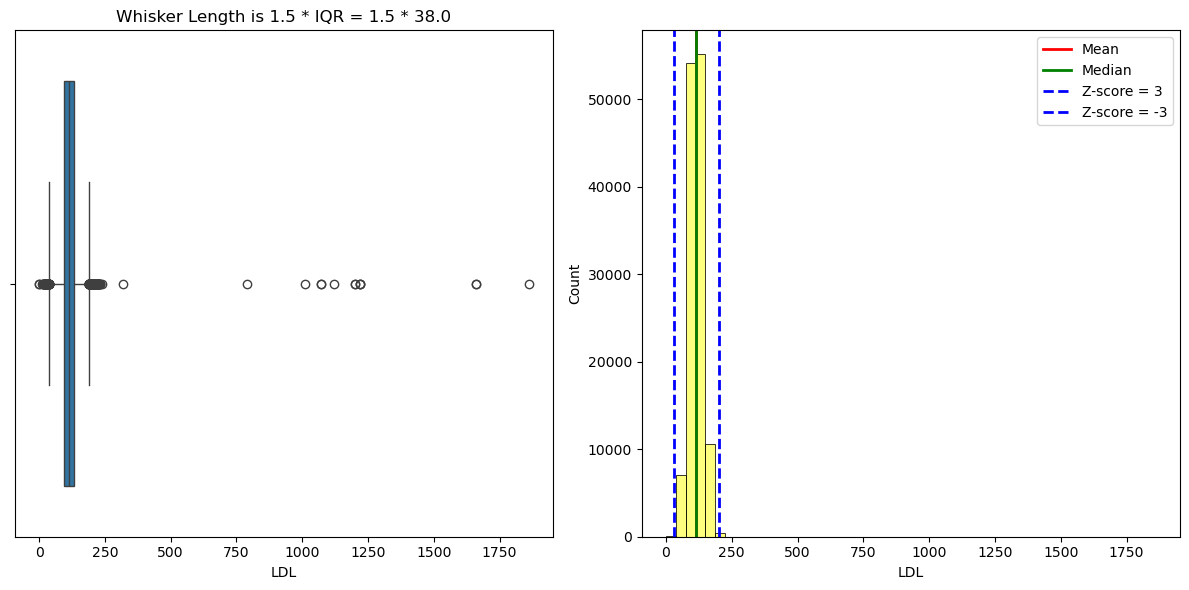

In [40]:
# Analyzing LDL Feature without information about the target
LDL_feature = train_df["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

# Define the statistics
statistics = [
    ["Mean", round(LDL_mean, 3)],
    ["Median", round(LDL_median, 3)],
    ["Max Value", round(LDL_max_val, 3)],
    ["Min Value", round(LDL_min_val, 3)],
    ["Range", round(LDL_range, 3)],
    ["Standard Deviation", round(LDL_std, 3)],
    ["Skew", round(LDL_skew, 3)],
    ["IQR", round(LDL_iqr, 3)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)

# Create subplots for Box Plot and Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature, ax=axes[0])
axes[0].set_xlabel('LDL')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('LDL')
axes[1].set_ylabel('Count')
axes[1].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[1].axvline(LDL_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


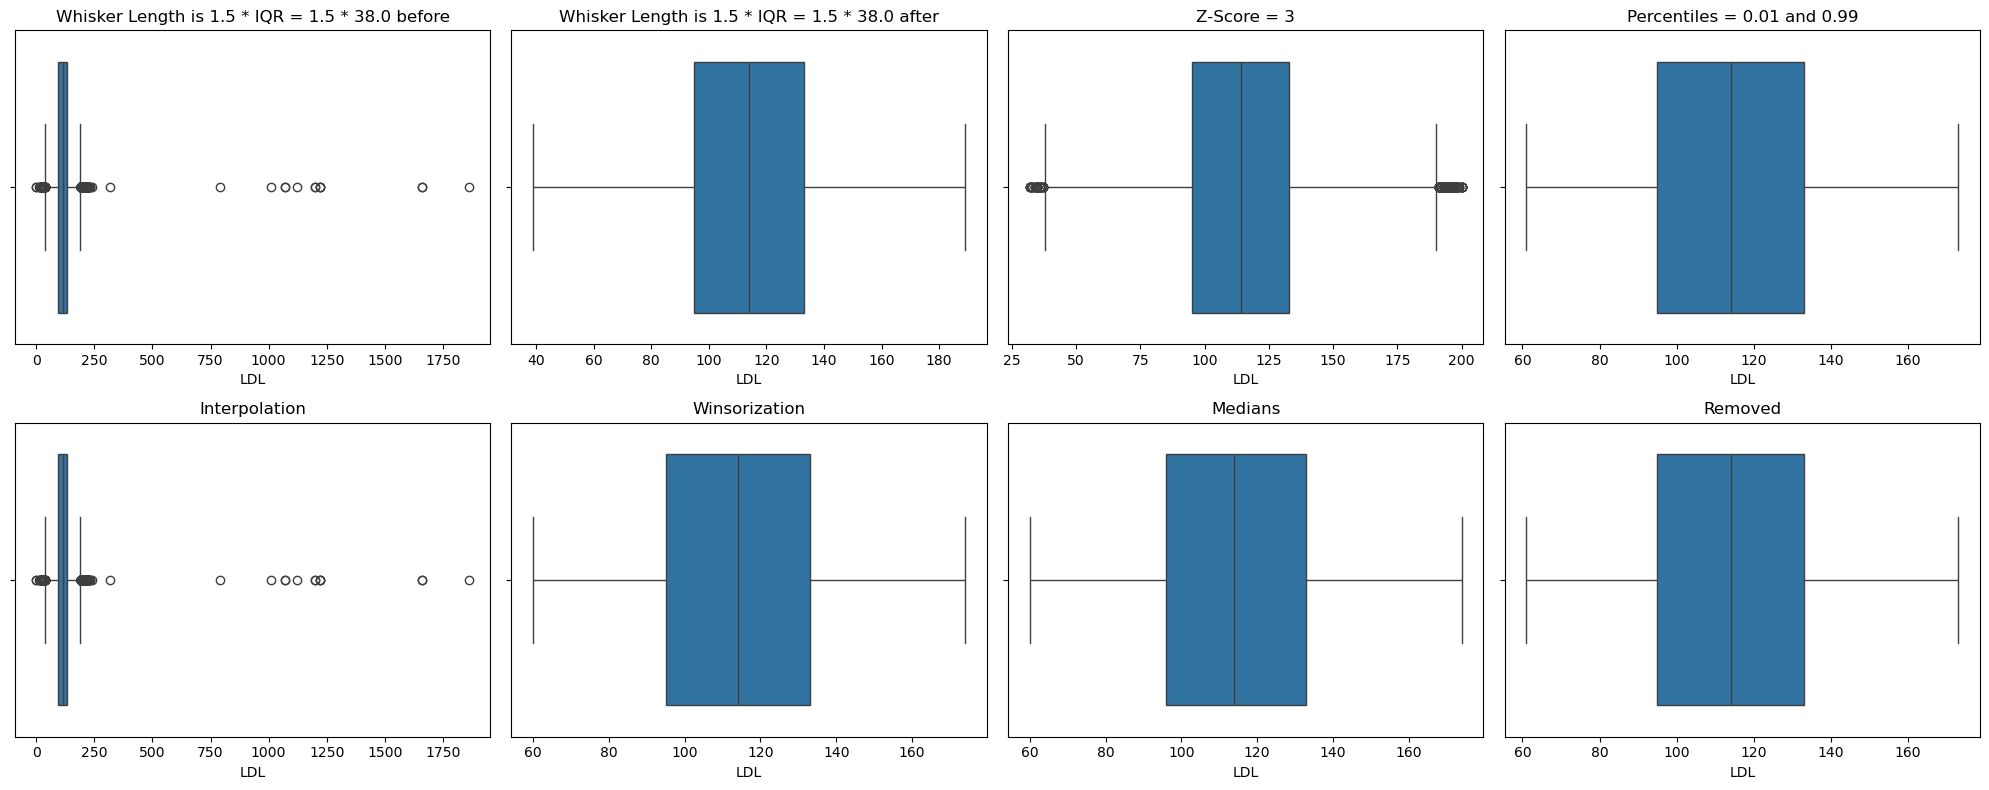

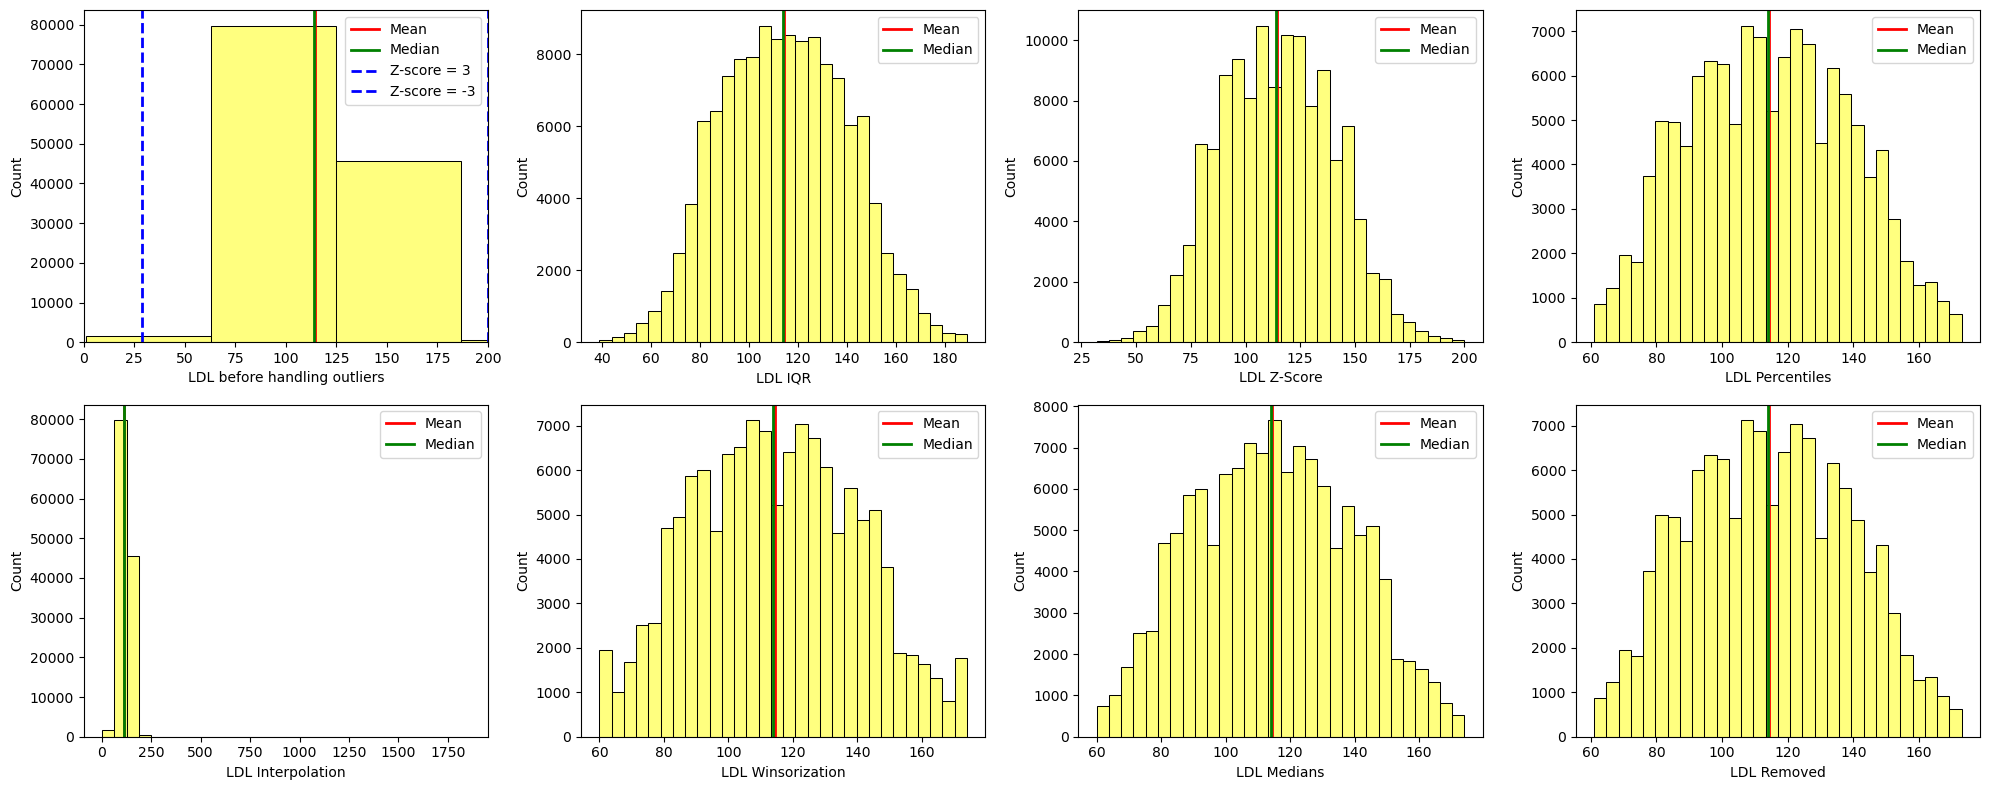

In [41]:
# Handling Outliers using IQR
LDL_q1 = LDL_feature.quantile(0.25)
LDL_q3 = LDL_feature.quantile(0.75)
LDL_iqr = LDL_q3 - LDL_q1
LDL_lower_limit = LDL_q1 - 1.5 * LDL_iqr
LDL_upper_limit = LDL_q3 + 1.5 * LDL_iqr
LDL_feature_IQR = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]

# Handling Outliers using Z-Score
LDL_mean = LDL_feature.mean()
LDL_std = LDL_feature.std()
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean
LDL_feature_Z = LDL_feature[(LDL_feature > z_score_negative3) & (LDL_feature < z_score_positive3)]

# Handling Outliers using Percentiles
LDL_lower_limit = LDL_feature.quantile(0.01)
LDL_upper_limit = LDL_feature.quantile(0.99)
LDL_feature_P = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]

# Handling Outliers using Interpolation
LDL_feature_interpolate = LDL_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
LDL_feature_winsorized = LDL_feature.clip(lower=LDL_lower_limit, upper=LDL_upper_limit)

# Handling Outliers using medians
LDL_feature_median = LDL_feature.copy()
LDL_feature_median[LDL_feature_median > LDL_upper_limit] = LDL_feature.median()
LDL_feature_median[LDL_feature_median < LDL_lower_limit] = LDL_feature.median()

# Handling Outliers by removing them
LDL_feature_removed = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for LDL Feature before handling outliers
sns.boxplot(x=LDL_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('LDL')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)} before")

# Box Plot for LDL Feature after handling outliers using IQR
sns.boxplot(x=LDL_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('LDL')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)} after")

# Box Plot for LDL Feature after handling outliers using Z-Score
sns.boxplot(x=LDL_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('LDL')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for LDL Feature after handling outliers using Percentiles
sns.boxplot(x=LDL_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('LDL')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for LDL Feature after handling outliers using Interpolation
sns.boxplot(x=LDL_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('LDL')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for LDL Feature after handling outliers using Winsorization
sns.boxplot(x=LDL_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('LDL')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for LDL Feature after handling outliers using medians
sns.boxplot(x=LDL_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('LDL')
axes[1, 2].set_title(f"Medians")

# Box Plot for LDL Feature after handling outliers by removing them
sns.boxplot(x=LDL_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('LDL')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for LDL Feature before handling outliers
sns.histplot(LDL_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0,0].set_xlim([0, 200])
axes[0, 0].set_xlabel('LDL before handling outliers')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(LDL_median, c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for LDL Feature after handling outliers using IQR
sns.histplot(LDL_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('LDL IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(LDL_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(LDL_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Z-Score
sns.histplot(LDL_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('LDL Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(LDL_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(LDL_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Percentiles
sns.histplot(LDL_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('LDL Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(LDL_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(LDL_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Interpolation
sns.histplot(LDL_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('LDL Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(LDL_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(LDL_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Winsorization
sns.histplot(LDL_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('LDL Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(LDL_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(LDL_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using medians
sns.histplot(LDL_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('LDL Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(LDL_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(LDL_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers by removing them
sns.histplot(LDL_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('LDL Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(LDL_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(LDL_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


LDL:
Mean 114.509
Median 114.0
Max Value 318
Min Value 1
Range 317
Standard Deviation 25.953
Skew 0.132
IQR 38.0
Z-score = 3 192.36928623911706, Z-score = -3 36.648446567753126


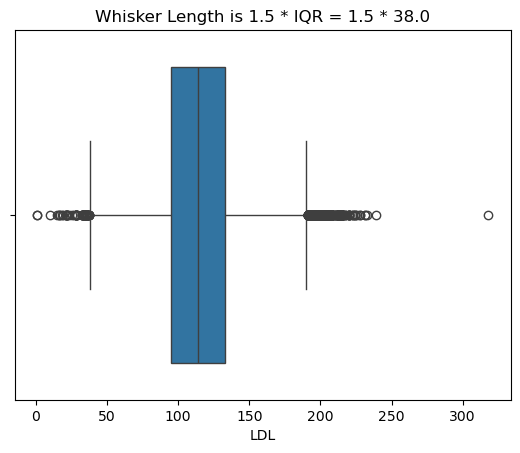

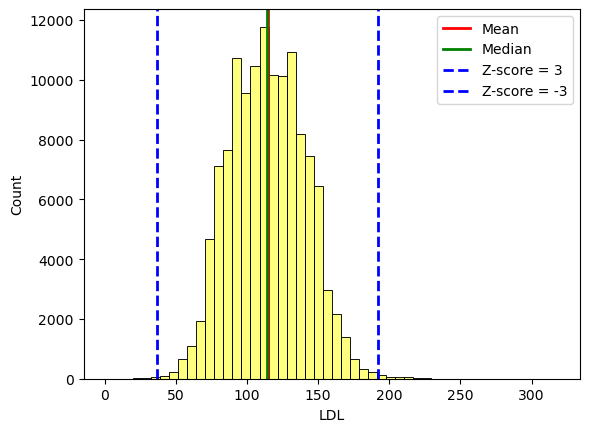

In [42]:
#Analysis After Removing Outliers

# Analyzing LDL Feature without information about the target
LDL_feature = train_df[train_df["LDL"] < 500]["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")
print(f"Z-score = 3 {z_score_positive3}, Z-score = -3 {z_score_negative3}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

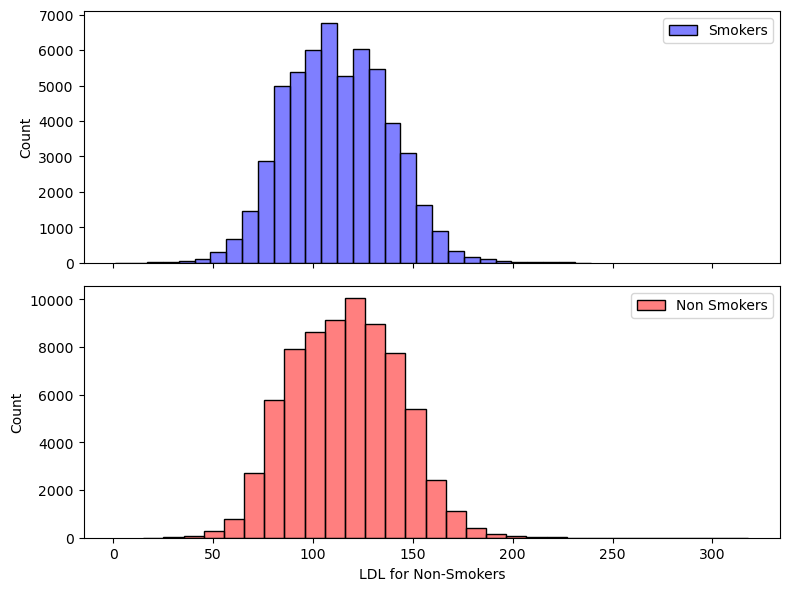

+------------------------------------+---------+
| Statistic                          |   Value |
+====================================+=========+
| Mean for Non Smokers               |  116.26 |
+------------------------------------+---------+
| Standard Deviation for Non Smokers |   26.47 |
+------------------------------------+---------+
| Mean for Smokers                   |  112.25 |
+------------------------------------+---------+
| Standard Deviation for Smokers     |   25.09 |
+------------------------------------+---------+


In [43]:

# Separate data for smokers and non-smokers based on 'LDL' levels
df_LDL_outliers_removed = train_df[train_df["LDL"] < 500]

LDL_smokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 1]['LDL']
LDL_nonsmokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 0]['LDL']

# Creating subplots with two histograms stacked vertically for 'LDL' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=LDL_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('LDL for Smokers')
ax1.legend()

sns.histplot(data=LDL_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('LDL for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the statistics
statistics = [
    ["Mean for Non Smokers", round(LDL_nonsmokers.mean(), 2)],
    ["Standard Deviation for Non Smokers", round(LDL_nonsmokers.std(), 2)],
    ["Mean for Smokers", round(LDL_smokers.mean(), 2)],
    ["Standard Deviation for Smokers", round(LDL_smokers.std(), 2)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)



#### **Removing Outliers**

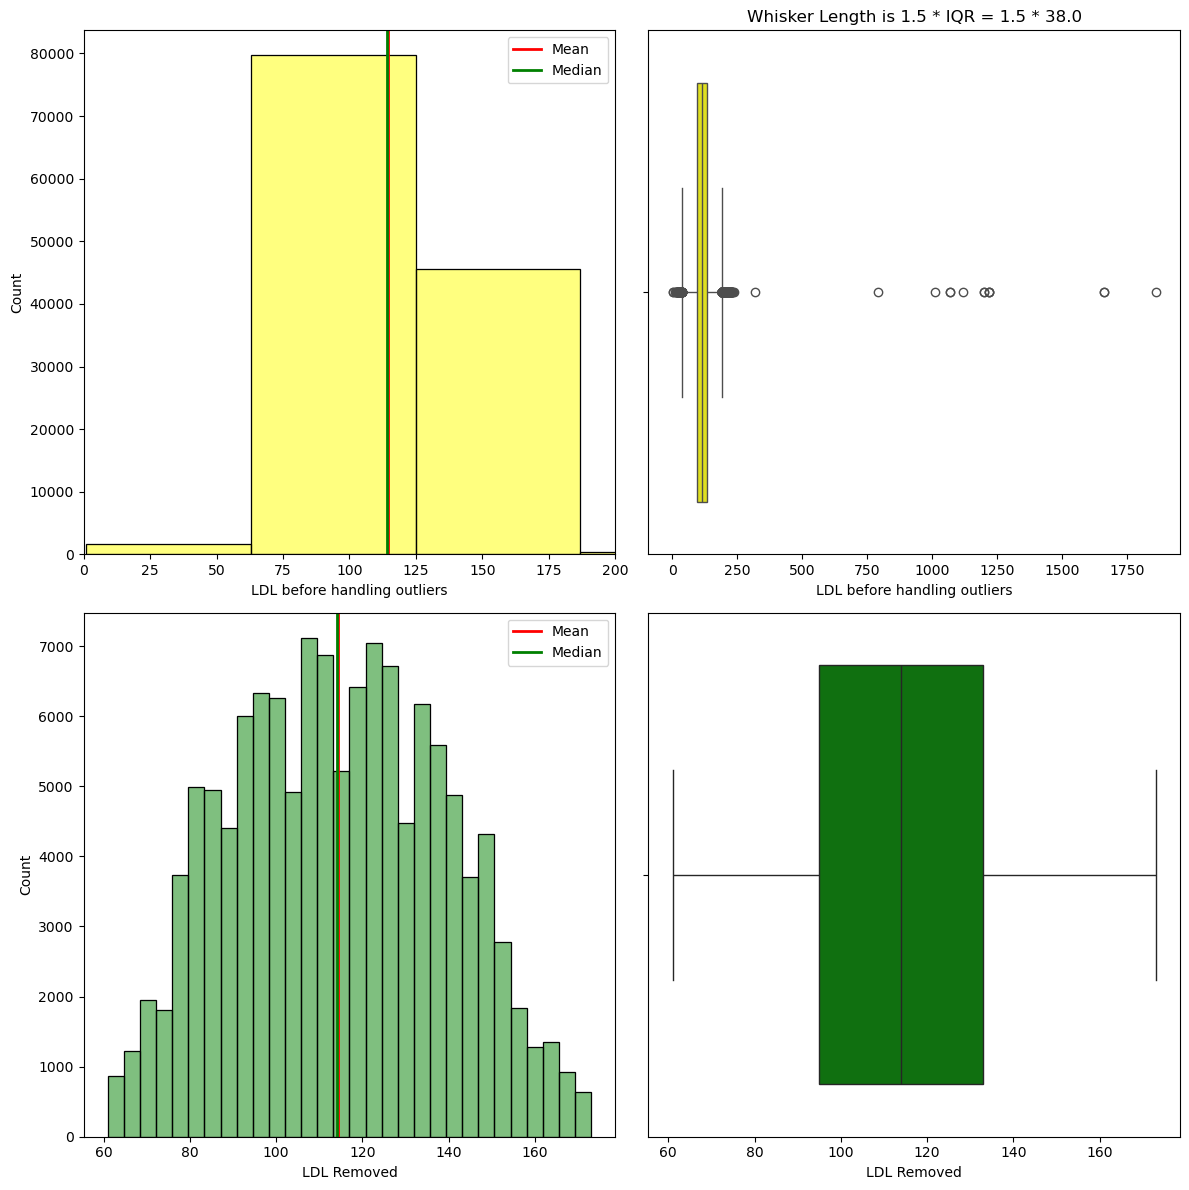

In [44]:
LDL_feature = train_df["LDL"]

# Create subplots with four plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Histogram for LDL Feature before handling outliers
sns.histplot(LDL_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('LDL before handling outliers')
axes[0, 0].set_xlim([0, 200])
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(LDL_median, c='green', ls='-', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median'])

# Box Plot for LDL Feature before handling outliers
sns.boxplot(x=LDL_feature, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('LDL before handling outliers')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")

# Remove outliers using z-score from the training data
# Calculate z-score
LDL_mean = LDL_feature.mean()
LDL_std = LDL_feature.std()
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean
train_df = train_df[(train_df['LDL'] > z_score_negative3) & (train_df['LDL'] < z_score_positive3)]

# Histogram for LDL Feature after handling outliers using Z-Score
sns.histplot(LDL_feature_removed, bins=30, alpha=0.5, color="green", ax=axes[1, 0])
axes[1, 0].set_xlabel('LDL Removed')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(LDL_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(LDL_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Box Plot for LDL Feature after handling outliers using Z-Score
sns.boxplot(x=LDL_feature_removed, color="green", ax=axes[1, 1])
axes[1, 1].set_xlabel('LDL Removed')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### feature 6: Height

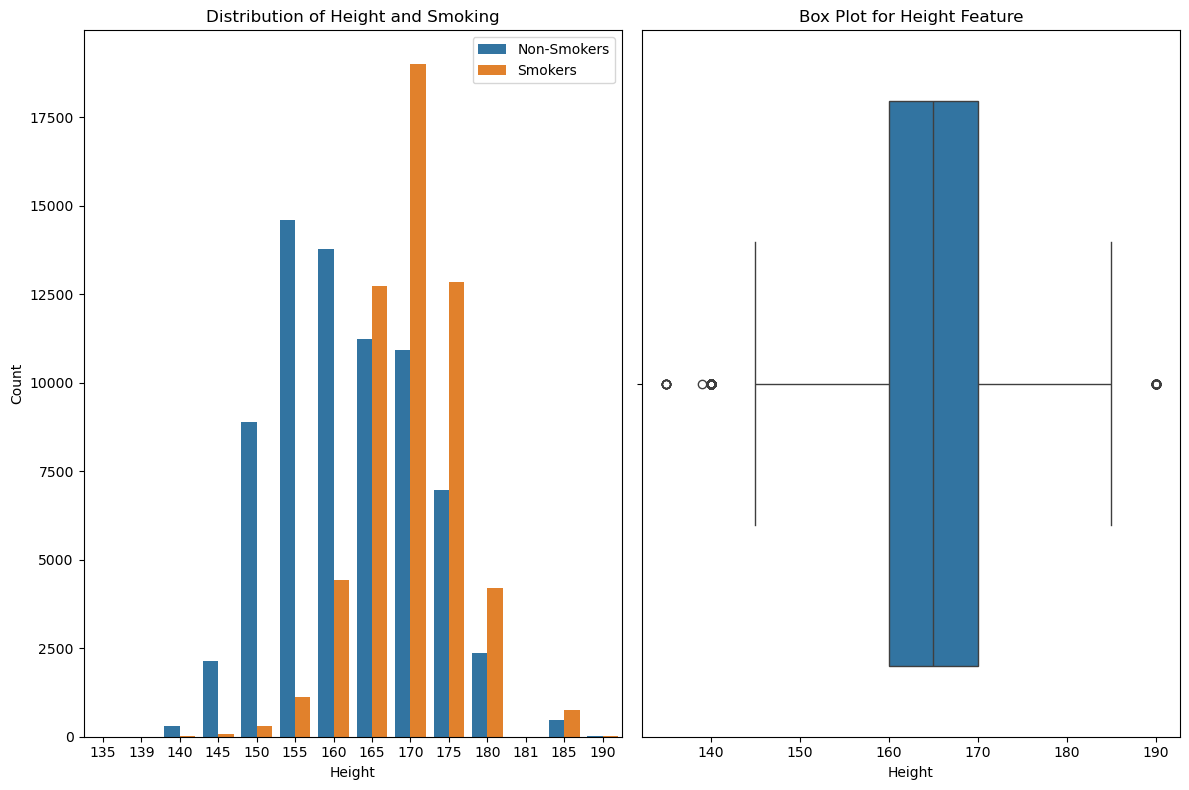

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Distribution of Height Feature with respect to the target
sns.countplot(x="height(cm)", data=train_df, hue="smoking", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Height and Smoking')
ax1.legend(labels=["Non-Smokers", "Smokers"])

# box plot for height feature
sns.boxplot(x="height(cm)", data=train_df, ax=ax2)
ax2.set_xlabel('Height')
ax2.set_title('Box Plot for Height Feature')

plt.tight_layout()
plt.show()


In [46]:


# Analyzing Height Feature for Smokers
height_smokers = train_df[train_df["smoking"] == 1][["height(cm)"]]
height_smokers_percentage = 100 * len(height_smokers[height_smokers["height(cm)"] > 160]) / len(height_smokers)
height_nonsmokers = train_df[train_df["smoking"] == 0][["height(cm)"]]
height_nonsmokers_percentage = 100 * len(height_nonsmokers[height_nonsmokers["height(cm)"] > 160]) / len(height_nonsmokers)

# Central Tendency Measures
height_smokers_mean = height_smokers.mean()
height_smokers_median = height_smokers.median()
height_nonsmokers_mean = height_nonsmokers.mean()
height_nonsmokers_median = height_nonsmokers.median()

# Measures of Dispersion
height_smokers_max_val = height_smokers.max()
height_smokers_min_val = height_smokers.min()
height_smokers_range = height_smokers_max_val - height_smokers_min_val
height_smokers_std = height_smokers.std()
height_smokers_skew = height_smokers.skew()
height_smokers_iqr = height_smokers.quantile(0.75) - height_smokers.quantile(0.25)
height_nonsmokers_max_val = height_nonsmokers.max()
height_nonsmokers_min_val = height_nonsmokers.min()
height_nonsmokers_range = height_nonsmokers_max_val - height_nonsmokers_min_val
height_nonsmokers_std = height_nonsmokers.std()
height_nonsmokers_skew = height_nonsmokers.skew()
height_nonsmokers_iqr = height_nonsmokers.quantile(0.75) - height_nonsmokers.quantile(0.25)

# Create table data
table_data = [
    ["", "Smokers", "Non-Smokers"],
    ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
    ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
    ["Max Value", round(height_smokers_max_val[0], 3), round(height_nonsmokers_max_val[0], 3)],
    ["Min Value", round(height_smokers_min_val[0], 3), round(height_nonsmokers_min_val[0], 3)],
    ["Range", round(height_smokers_range[0], 3), round(height_nonsmokers_range[0], 3)],
    ["Standard Deviation", round(height_smokers_std[0], 3), round(height_nonsmokers_std[0], 3)],
    ["Skew", round(height_smokers_skew[0], 3), round(height_nonsmokers_skew[0], 3)],
    ["IQR", round(height_smokers_iqr[0], 3), round(height_nonsmokers_iqr[0], 3)]
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

# Set table alignment
table.align = "c"

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Height For Smokers
sns.countplot(x="height(cm)", data=height_smokers, hue="height(cm)", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Height (Smokers)')
ax1.legend(labels=["< 160", "> 160"])

# Histogram for Height For Non-Smokers
sns.countplot(x="height(cm)", data=height_nonsmokers, hue="height(cm)", ax=ax2)
ax2.set_xlabel('Height')
ax2.set_ylabel('Count')
ax2.set_title('Height (Non-Smokers)')
ax2.legend(labels=["< 160", "> 160"])


plt.tight_layout()
plt.show()


╒════════════════════╤═══════════╤═══════════════╕
│                    │   Smokers │   Non-Smokers │
╞════════════════════╪═══════════╪═══════════════╡
│ Mean               │   169.742 │       161.799 │
├────────────────────┼───────────┼───────────────┤
│ Median             │   170     │       160     │
├────────────────────┼───────────┼───────────────┤
│ Max Value          │   190     │       190     │
├────────────────────┼───────────┼───────────────┤
│ Min Value          │   135     │       135     │
├────────────────────┼───────────┼───────────────┤
│ Range              │    55     │        55     │
├────────────────────┼───────────┼───────────────┤
│ Standard Deviation │     6.149 │         9.013 │
├────────────────────┼───────────┼───────────────┤
│ Skew               │    -0.251 │         0.192 │
├────────────────────┼───────────┼───────────────┤
│ IQR                │    10     │        15     │
╘════════════════════╧═══════════╧═══════════════╛


/tmp/ipykernel_14888/911518981.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
/tmp/ipykernel_14888/911518981.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
/tmp/ipykernel_14888/911518981.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Max Value", ro

AttributeError: 'str' object has no attribute 'align'

### **Handling Outliers**

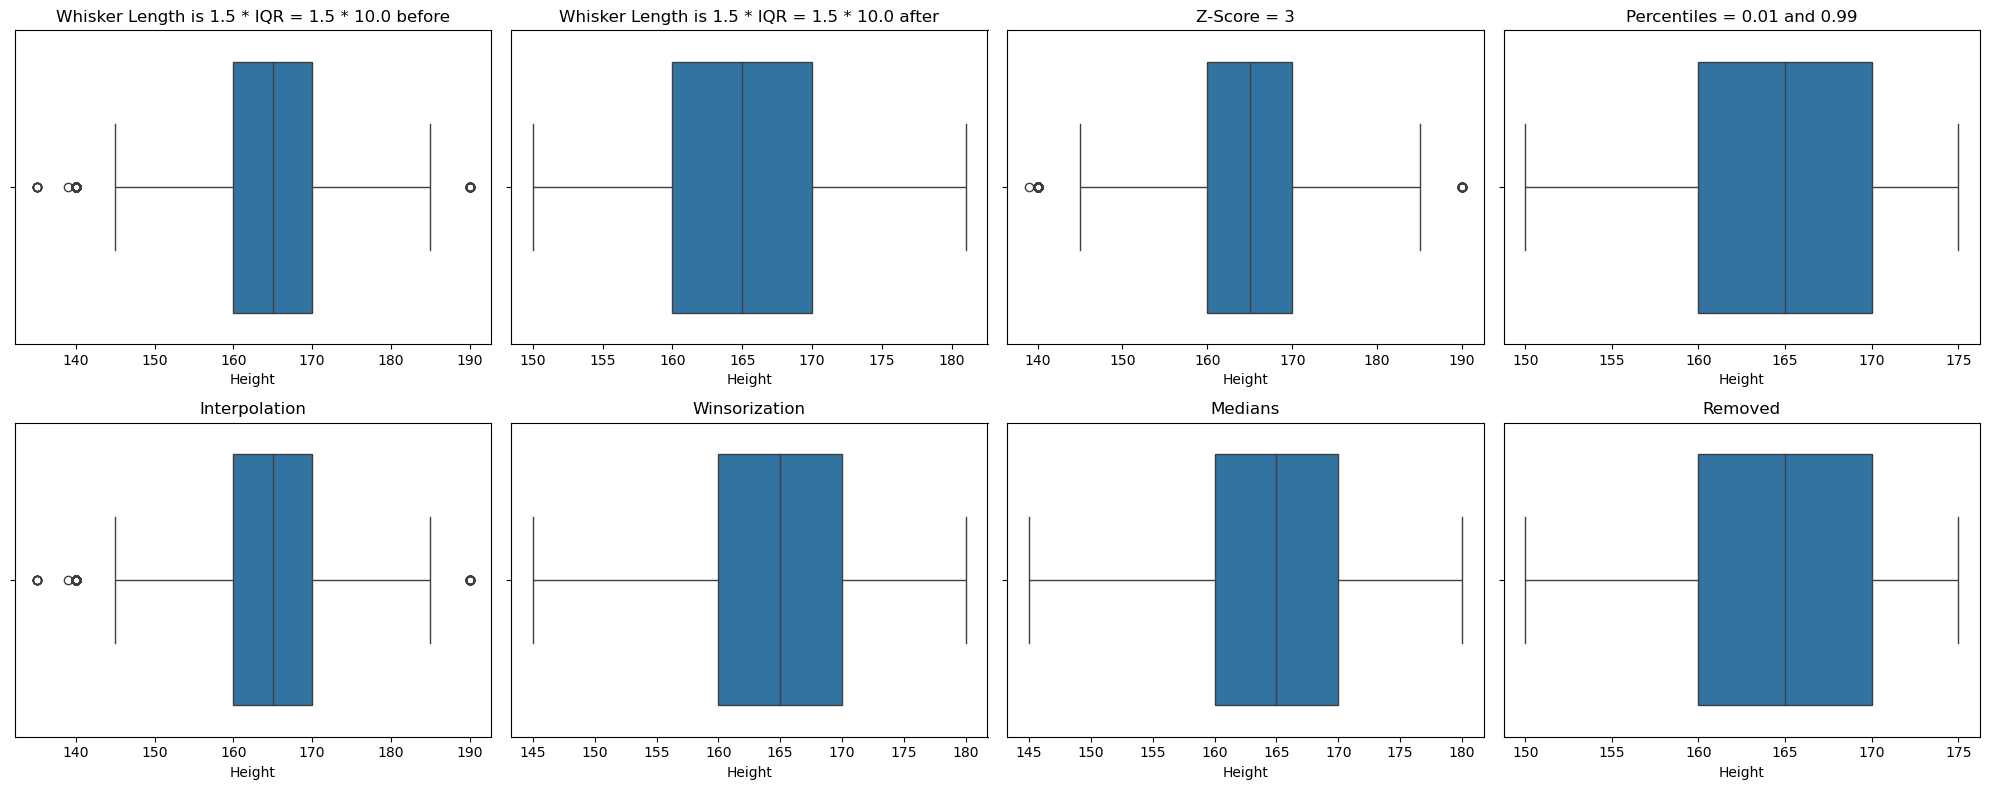

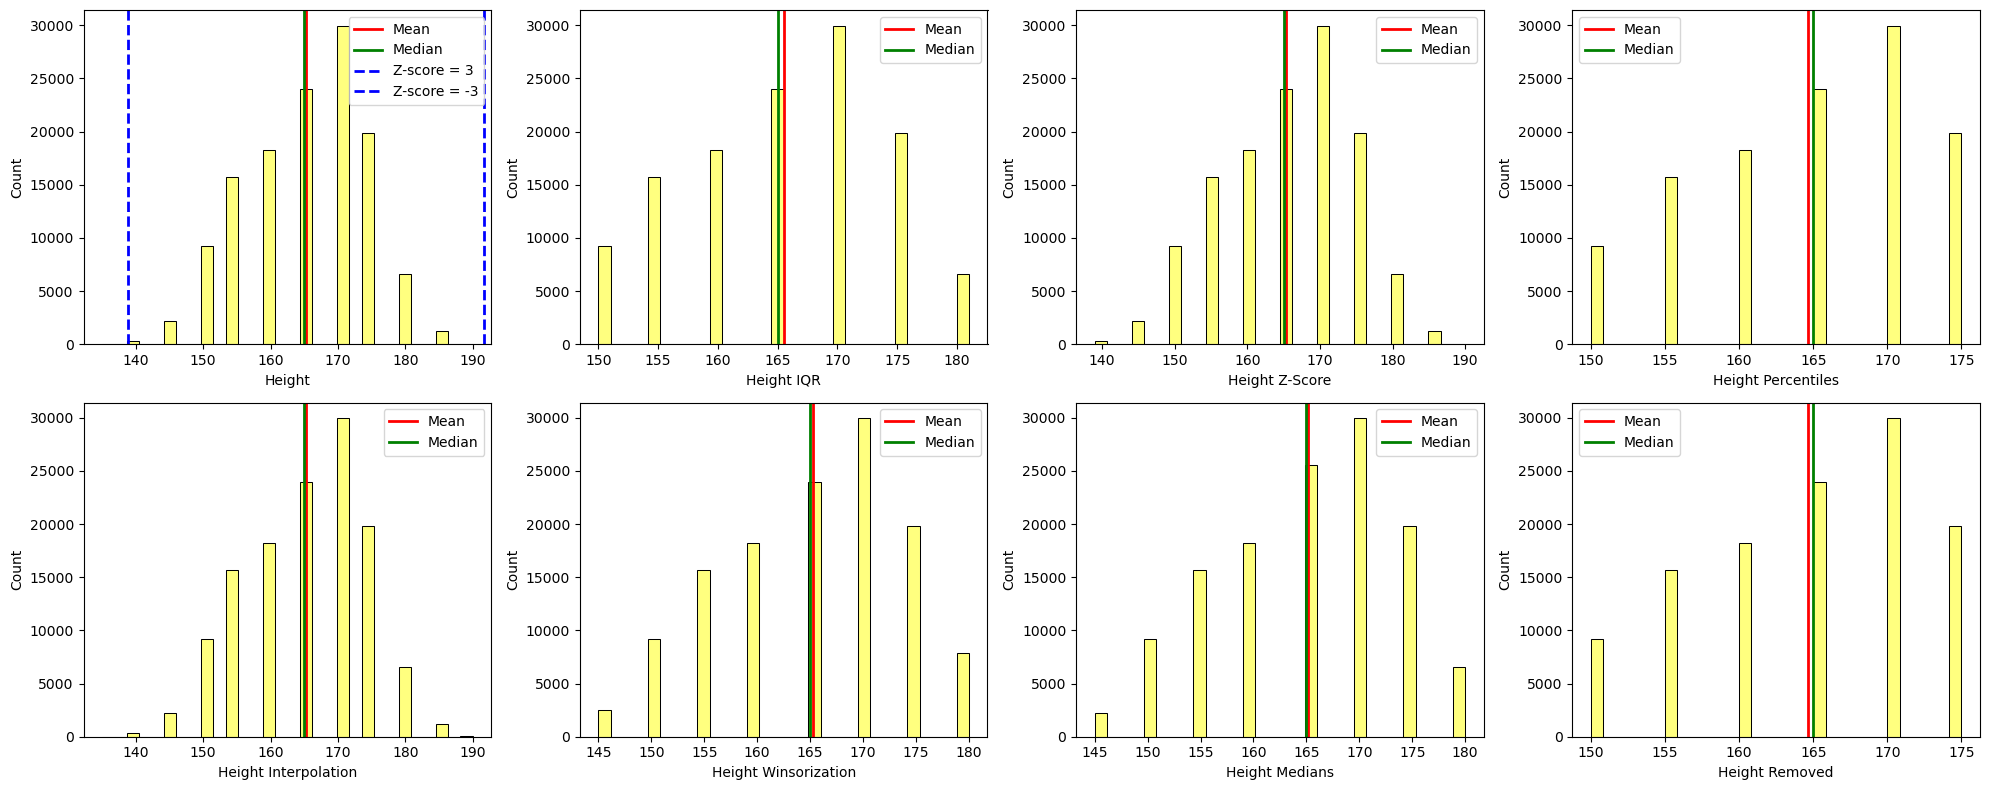

In [47]:
height_feature = train_df["height(cm)"]

# Handling Outliers using IQR
height_q1 = height_feature.quantile(0.25)
height_q3 = height_feature.quantile(0.75)
height_iqr = height_q3 - height_q1
height_lower_limit = height_q1 - 1.5 * height_iqr
height_upper_limit = height_q3 + 1.5 * height_iqr
height_feature_IQR = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]

# Handling Outliers using Z-Score
height_mean = height_feature.mean()
height_std = height_feature.std()
z_score_positive3 = 3 * height_std + height_mean
z_score_negative3 = -3 * height_std + height_mean
height_feature_Z = height_feature[(height_feature > z_score_negative3) & (height_feature < z_score_positive3)]

# Handling Outliers using Percentiles
height_lower_limit = height_feature.quantile(0.01)
height_upper_limit = height_feature.quantile(0.99)
height_feature_P = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]

# Handling Outliers using Interpolation
height_feature_interpolate = height_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
height_feature_winsorized = height_feature.clip(lower=height_lower_limit, upper=height_upper_limit)

# Handling Outliers using medians
height_feature_median = height_feature.copy()
height_feature_median[height_feature_median > height_upper_limit] = height_feature.median()
height_feature_median[height_feature_median < height_lower_limit] = height_feature.median()

# Handling Outliers by removing them
height_feature_removed = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Height Feature before handling outliers
sns.boxplot(x=height_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} before")

# Box Plot for Height Feature after handling outliers using IQR
sns.boxplot(x=height_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} after")

# Box Plot for Height Feature after handling outliers using Z-Score
sns.boxplot(x=height_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Height')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Height Feature after handling outliers using Percentiles
sns.boxplot(x=height_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Height')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Height Feature after handling outliers using Interpolation
sns.boxplot(x=height_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Height Feature after handling outliers using Winsorization
sns.boxplot(x=height_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Height')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Height Feature after handling outliers using medians
sns.boxplot(x=height_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Height')
axes[1, 2].set_title(f"Medians")

# Box Plot for Height Feature after handling outliers by removing them
sns.boxplot(x=height_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Height')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Height Feature before handling outliers
sns.histplot(height_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(height_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(height_feature.median(), c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for Height Feature after handling outliers using IQR
sns.histplot(height_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Height IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(height_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(height_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Z-Score
sns.histplot(height_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Height Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(height_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(height_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Percentiles
sns.histplot(height_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Height Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(height_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(height_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Interpolation
sns.histplot(height_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Height Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(height_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(height_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Winsorization
sns.histplot(height_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Height Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(height_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(height_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using medians
sns.histplot(height_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Height Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(height_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(height_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers by removing them
sns.histplot(height_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Height Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(height_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(height_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




### **Removing Outlier**


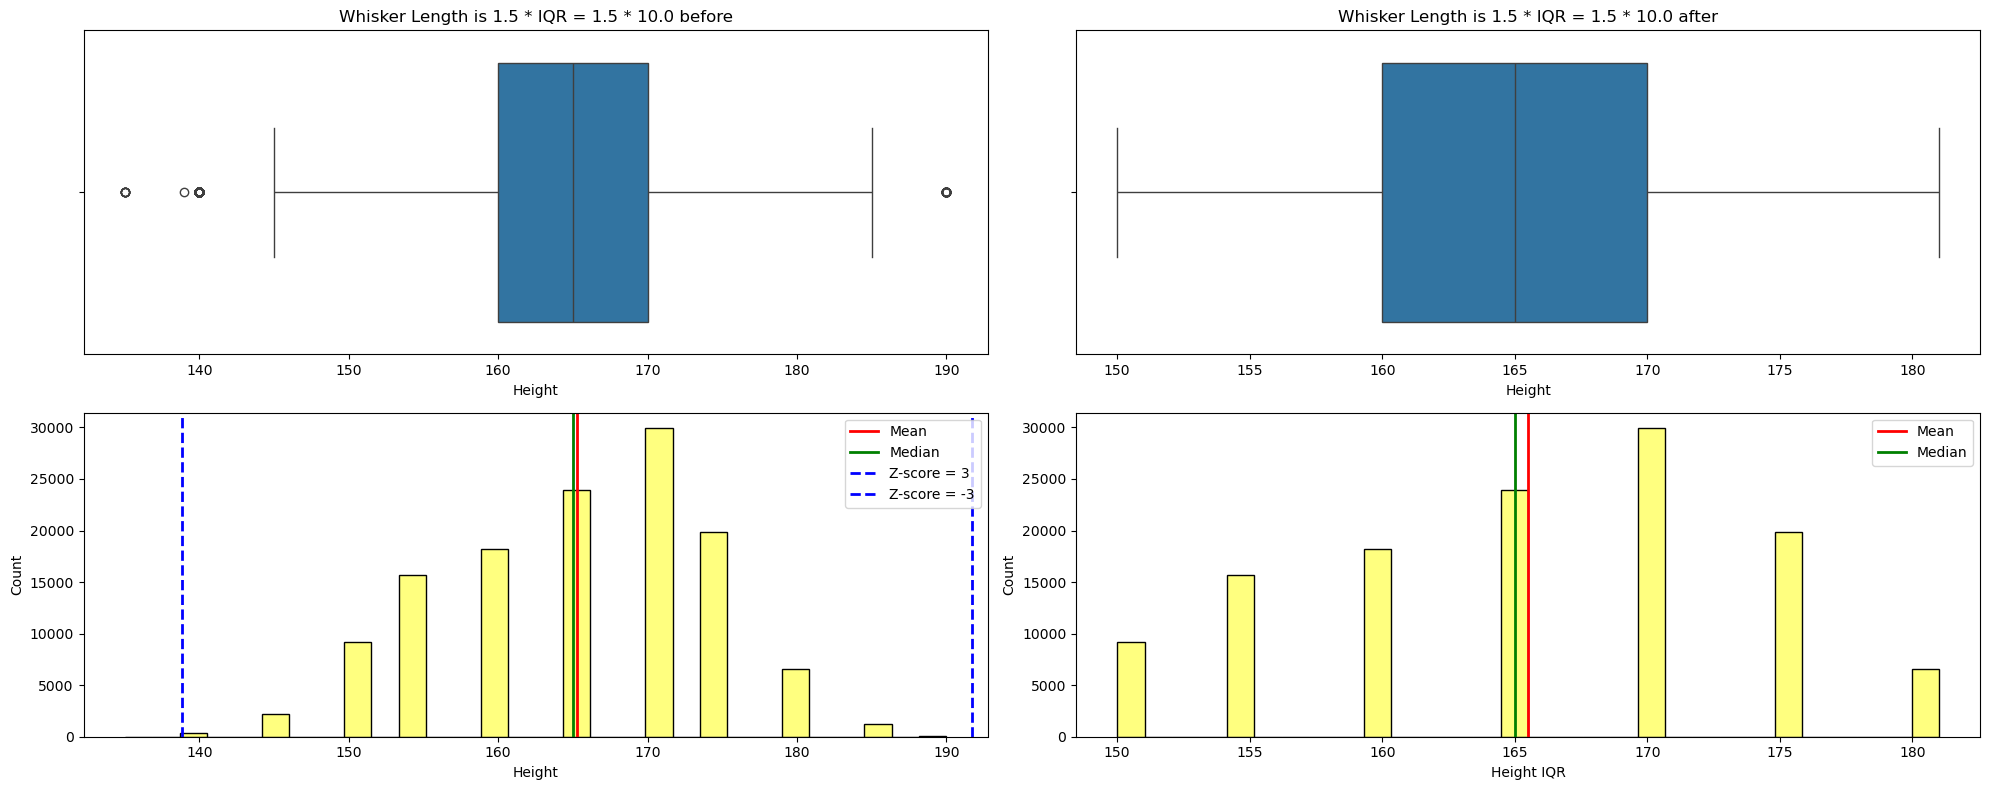

In [48]:
# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

# Box Plot for Height Feature before handling outliers
sns.boxplot(x=height_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} before")

# Histogram for Height Feature before handling outliers
sns.histplot(height_feature, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(height_mean, c='red', ls='-', lw=2)
axes[1, 0].axvline(height_feature.median(), c='green', ls='-', lw=2)
axes[1, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Remove outliers using IQR from train_df
train_df = train_df[(train_df["height(cm)"] > height_lower_limit) & (train_df["height(cm)"] < height_upper_limit)]

# Box Plot for Height Feature after handling outliers using IQR
sns.boxplot(x=height_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} after")

# Histogram for Height Feature after handling outliers using IQR
sns.histplot(height_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Height IQR')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(height_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(height_feature_IQR.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### feature 7: weight

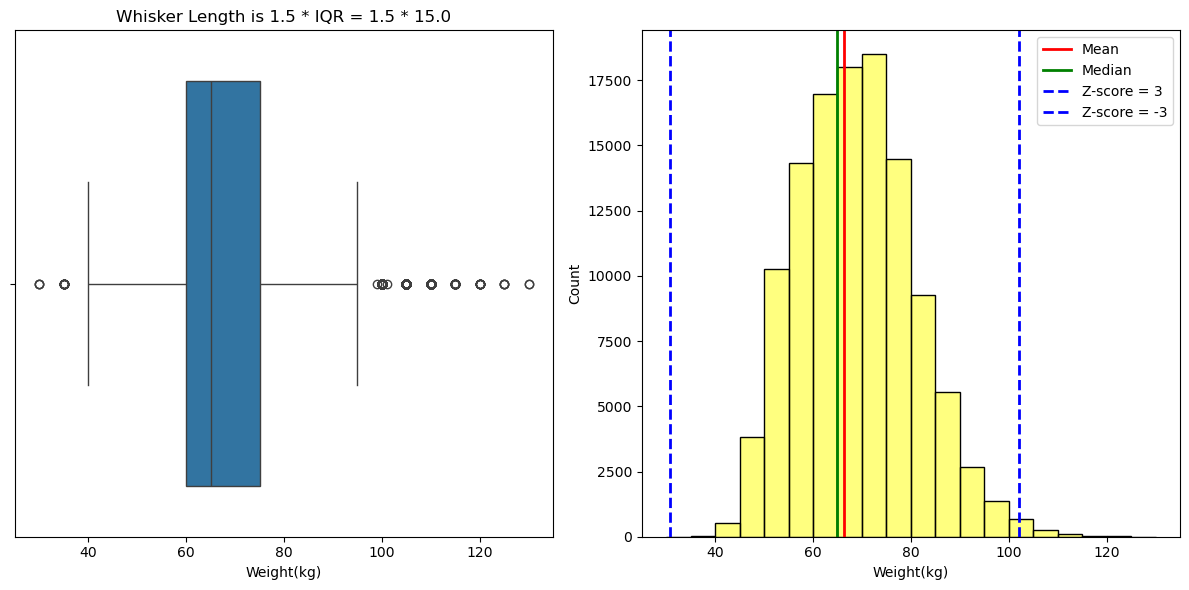

+------------+--------------------+---------+
| Feature    | Measure            |   Value |
+============+====================+=========+
| Weight(kg) | Mean               |  66.411 |
+------------+--------------------+---------+
|            | Median             |  65     |
+------------+--------------------+---------+
|            | Max Value          | 130     |
+------------+--------------------+---------+
|            | Min Value          |  30     |
+------------+--------------------+---------+
|            | Range              | 100     |
+------------+--------------------+---------+
|            | Standard Deviation |  11.897 |
+------------+--------------------+---------+
|            | Skew               |   0.376 |
+------------+--------------------+---------+
|            | IQR                |  15     |
+------------+--------------------+---------+


In [49]:

weight_feature = train_df["weight(kg)"]

# Central Tendency Measures
weight_mean = weight_feature.mean()
weight_median = weight_feature.median()

# Measures of Dispersion
weight_max_val = weight_feature.max()
weight_min_val = weight_feature.min()
weight_range = weight_max_val - weight_min_val
weight_std = weight_feature.std()
weight_skew = weight_feature.skew()
weight_iqr = weight_feature.quantile(0.75) - weight_feature.quantile(0.25)
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean

# Create subplots for box plot and histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Weight(kg) Feature
sns.boxplot(x=weight_feature, ax=axes[0])
axes[0].set_xlabel('Weight(kg)')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)}")

# Histogram for Weight(kg) Feature
sns.histplot(weight_feature, bins=20, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('Weight(kg)')
axes[1].set_ylabel('Count')
axes[1].axvline(weight_mean, c='red', ls='-', lw=2)
axes[1].axvline(weight_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create table data
table_data = [
    ["Weight(kg)", "Mean", round(weight_mean, 3)],
    ["", "Median", round(weight_median, 3)],
    ["", "Max Value", round(weight_max_val, 3)],
    ["", "Min Value", round(weight_min_val, 3)],
    ["", "Range", round(weight_range, 3)],
    ["", "Standard Deviation", round(weight_std, 3)],
    ["", "Skew", round(weight_skew, 3)],
    ["", "IQR", round(weight_iqr, 3)],
]

# Print the table
print(tabulate(table_data, headers=["Feature", "Measure", "Value"], tablefmt="grid"))


Average Weight for Smokers: 71.08 kg
Median Weight for Smokers: 70.00 kg
Average Weight for Non-Smokers: 62.86 kg
Median Weight for Non-Smokers: 60.00 kg


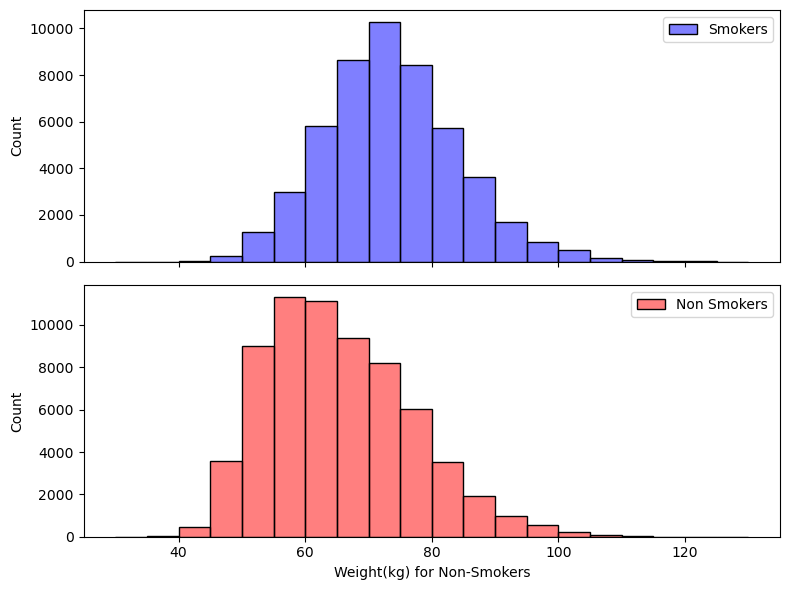

In [50]:
# Separate data for smokers and non-smokers based on 'weight(kg)' levels
weight_smokers = train_df[train_df['smoking'] == 1]['weight(kg)']
weight_nonsmokers = train_df[train_df['smoking'] == 0]['weight(kg)']

# Creating subplots with two histograms stacked vertically for 'Weight(kg)' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

avg_weight_smokers = weight_smokers.mean()
median_smokers = weight_smokers.median()
avg_weight_nonsmokers = weight_nonsmokers.mean()
median_nonsmokers = weight_nonsmokers.median()

# Print average weights
print(f"Average Weight for Smokers: {avg_weight_smokers:.2f} kg")
print(f"Median Weight for Smokers: {median_smokers:.2f} kg")
print(f"Average Weight for Non-Smokers: {avg_weight_nonsmokers:.2f} kg")
print(f"Median Weight for Non-Smokers: {median_nonsmokers:.2f} kg")

sns.histplot(data=weight_smokers, color='blue', alpha=0.5, bins=20, label='Smokers', ax=ax1)
ax1.set_xlabel('Weight(kg) for Smokers')
ax1.legend()

sns.histplot(data=weight_nonsmokers, color='red', alpha=0.5, bins=20, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Weight(kg) for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Handling Outliers**

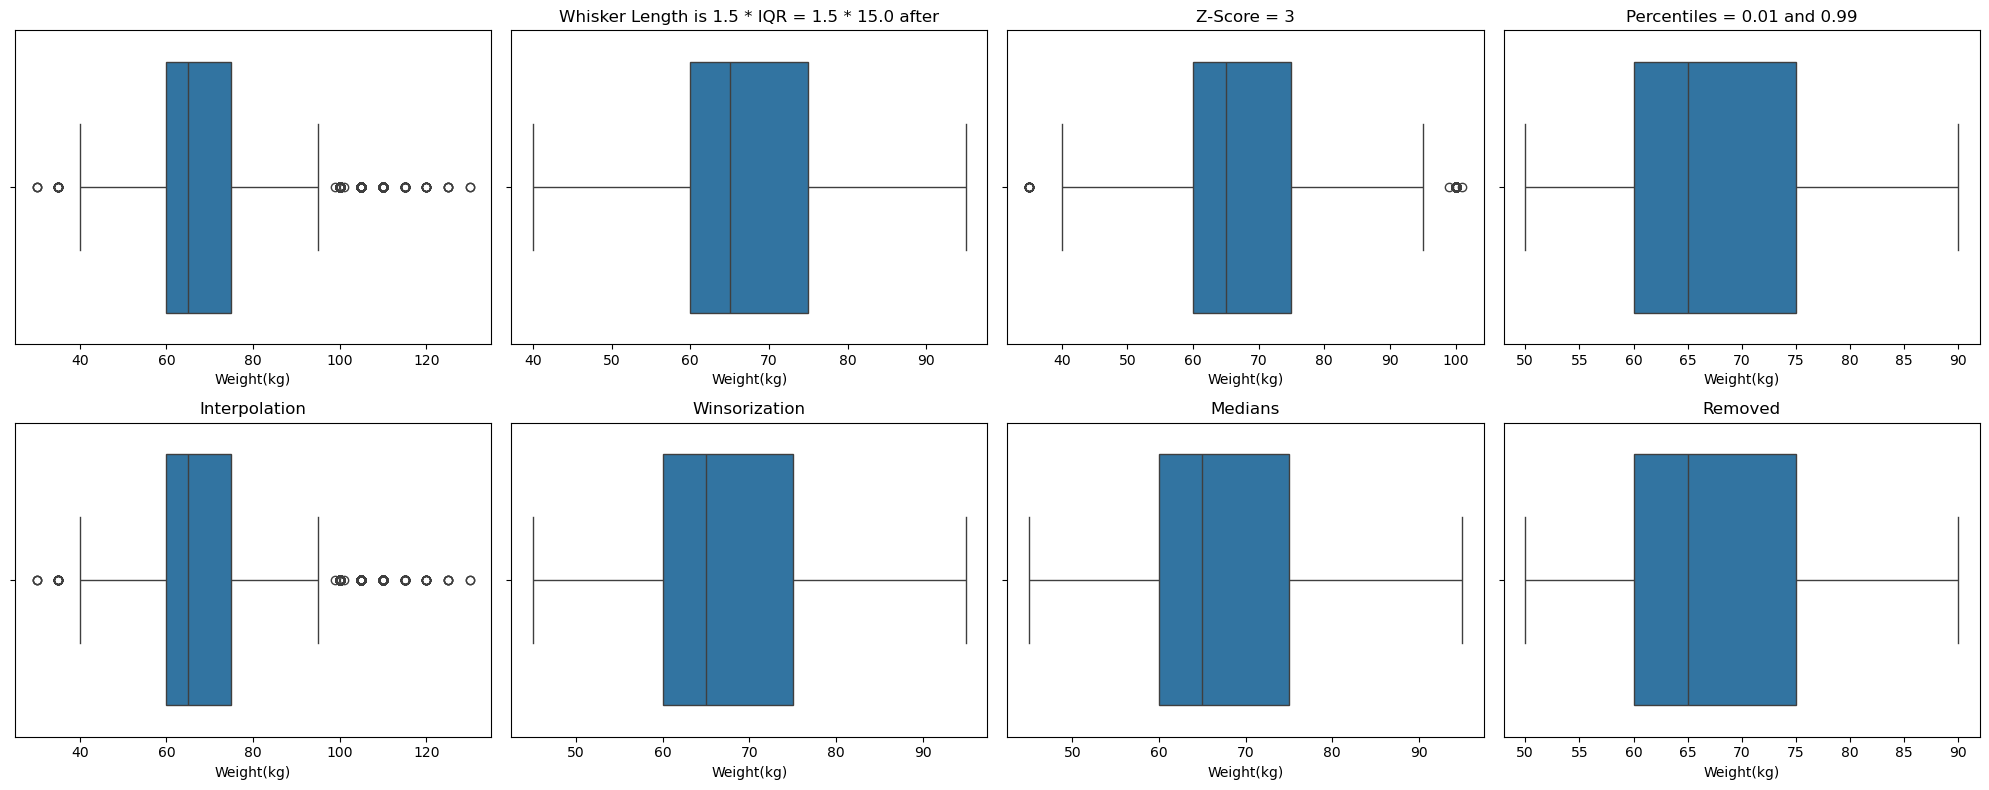

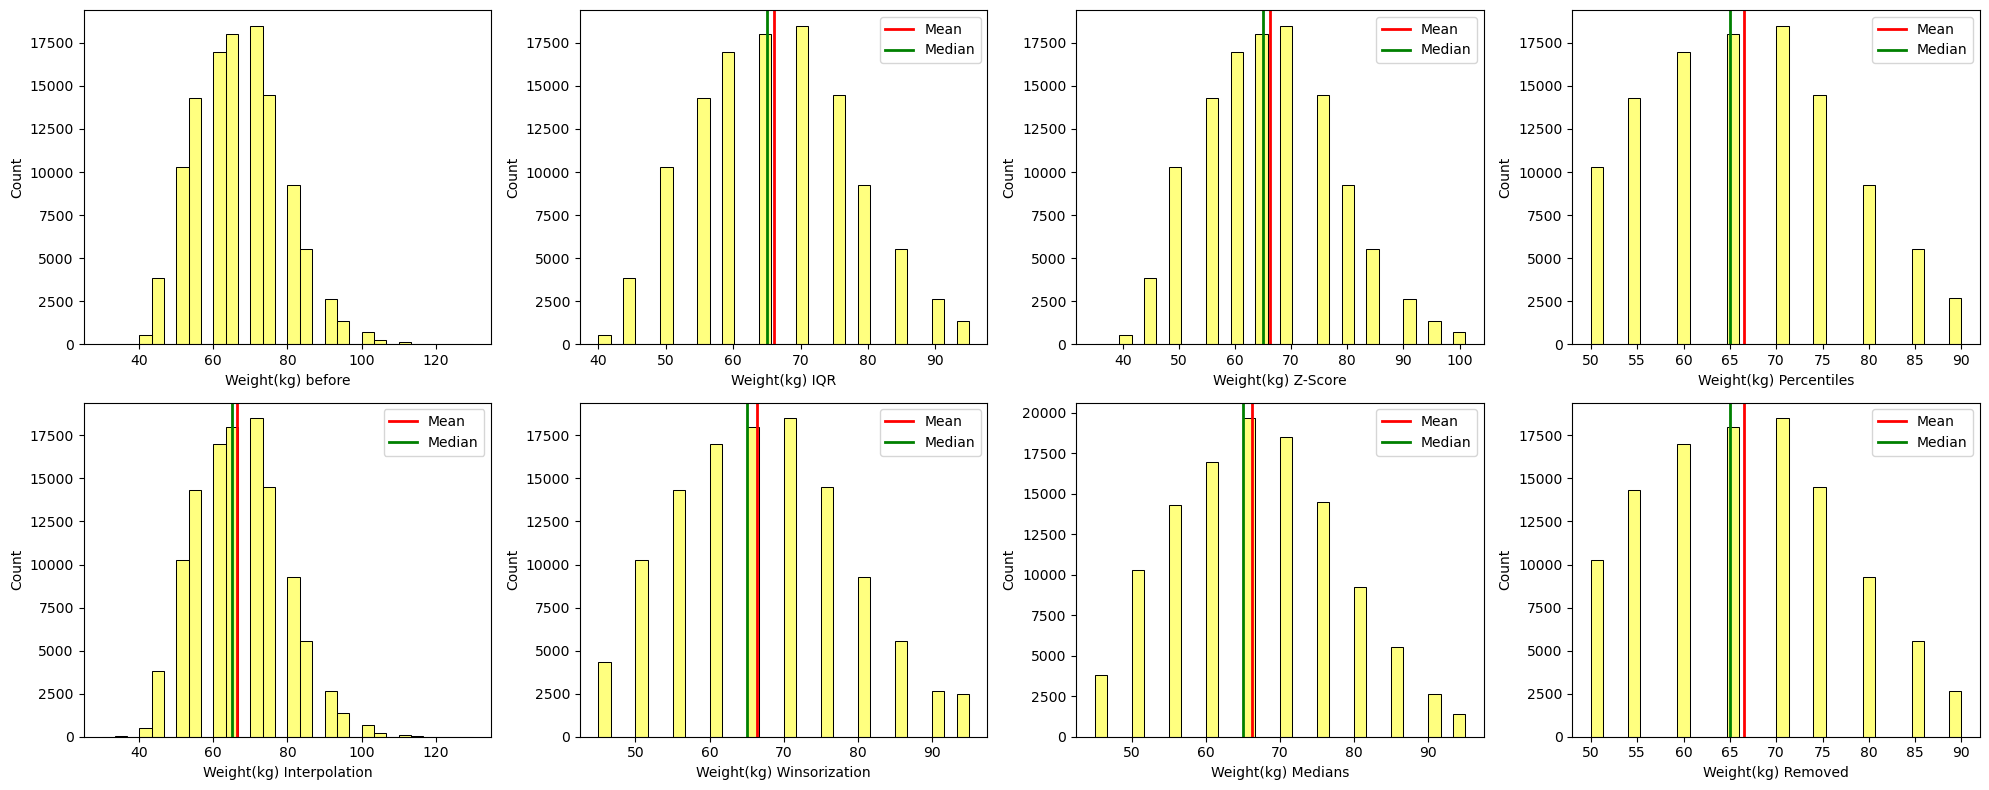

In [52]:
# Handling Outliers using IQR
weight_q1 = weight_feature.quantile(0.25)
weight_q3 = weight_feature.quantile(0.75)
weight_iqr = weight_q3 - weight_q1
weight_lower_limit = weight_q1 - 1.5 * weight_iqr
weight_upper_limit = weight_q3 + 1.5 * weight_iqr
weight_feature_IQR = weight_feature[(weight_feature > weight_lower_limit) & (weight_feature < weight_upper_limit)]

# Handling Outliers using Z-Score
weight_mean = weight_feature.mean()
weight_std = weight_feature.std()
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean
weight_feature_Z = weight_feature[(weight_feature > z_score_negative3) & (weight_feature < z_score_positive3)]

# Handling Outliers using Percentiles
weight_lower_limit = weight_feature.quantile(0.01)
weight_upper_limit = weight_feature.quantile(0.99)
weight_feature_P = weight_feature[(weight_feature > weight_lower_limit) & (weight_feature < weight_upper_limit)]

# Handling Outliers using Interpolation
weight_feature_interpolate = weight_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
weight_feature_winsorized = weight_feature.clip(lower=weight_lower_limit, upper=weight_upper_limit)

# Handling Outliers using medians
weight_feature_median = weight_feature.copy()
weight_feature_median[weight_feature_median > weight_upper_limit] = weight_feature.median()
weight_feature_median[weight_feature_median < weight_lower_limit] = weight_feature.median()

# Handling Outliers by removing them
weight_feature_removed = weight_feature[(weight_feature > weight_lower_limit) & (weight_feature < weight_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Weight(kg) Feature before handling outliers
sns.boxplot(x=weight_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Weight(kg)')

# Box Plot for Weight(kg) Feature after handling outliers using IQR
sns.boxplot(x=weight_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight(kg)')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)} after")

# Box Plot for Weight(kg) Feature after handling outliers using Z-Score
sns.boxplot(x=weight_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Weight(kg)')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Weight(kg) Feature after handling outliers using Percentiles
sns.boxplot(x=weight_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Weight(kg)')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Weight(kg) Feature after handling outliers using Interpolation
sns.boxplot(x=weight_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Weight(kg)')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Weight(kg) Feature after handling outliers using Winsorization
sns.boxplot(x=weight_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight(kg)')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Weight(kg) Feature after handling outliers using medians
sns.boxplot(x=weight_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Weight(kg)')
axes[1, 2].set_title(f"Medians")

# Box Plot for Weight(kg) Feature after handling outliers by removing them
sns.boxplot(x=weight_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Weight(kg)')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Weight(kg) Feature before handling outliers
sns.histplot(weight_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Weight(kg) before')
axes[0, 0].set_ylabel('Count')

# Histogram for Weight(kg) Feature after handling outliers using IQR
sns.histplot(weight_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight(kg) IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(weight_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(weight_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using Z-Score
sns.histplot(weight_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Weight(kg) Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(weight_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(weight_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])


# Histogram for Weight(kg) Feature after handling outliers using Percentiles
sns.histplot(weight_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Weight(kg) Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(weight_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(weight_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using Interpolation
sns.histplot(weight_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Weight(kg) Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(weight_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(weight_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using Winsorization
sns.histplot(weight_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight(kg) Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(weight_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(weight_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using medians
sns.histplot(weight_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Weight(kg) Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(weight_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(weight_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers by removing them
sns.histplot(weight_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Weight(kg) Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(weight_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(weight_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### **Removing Outliers**

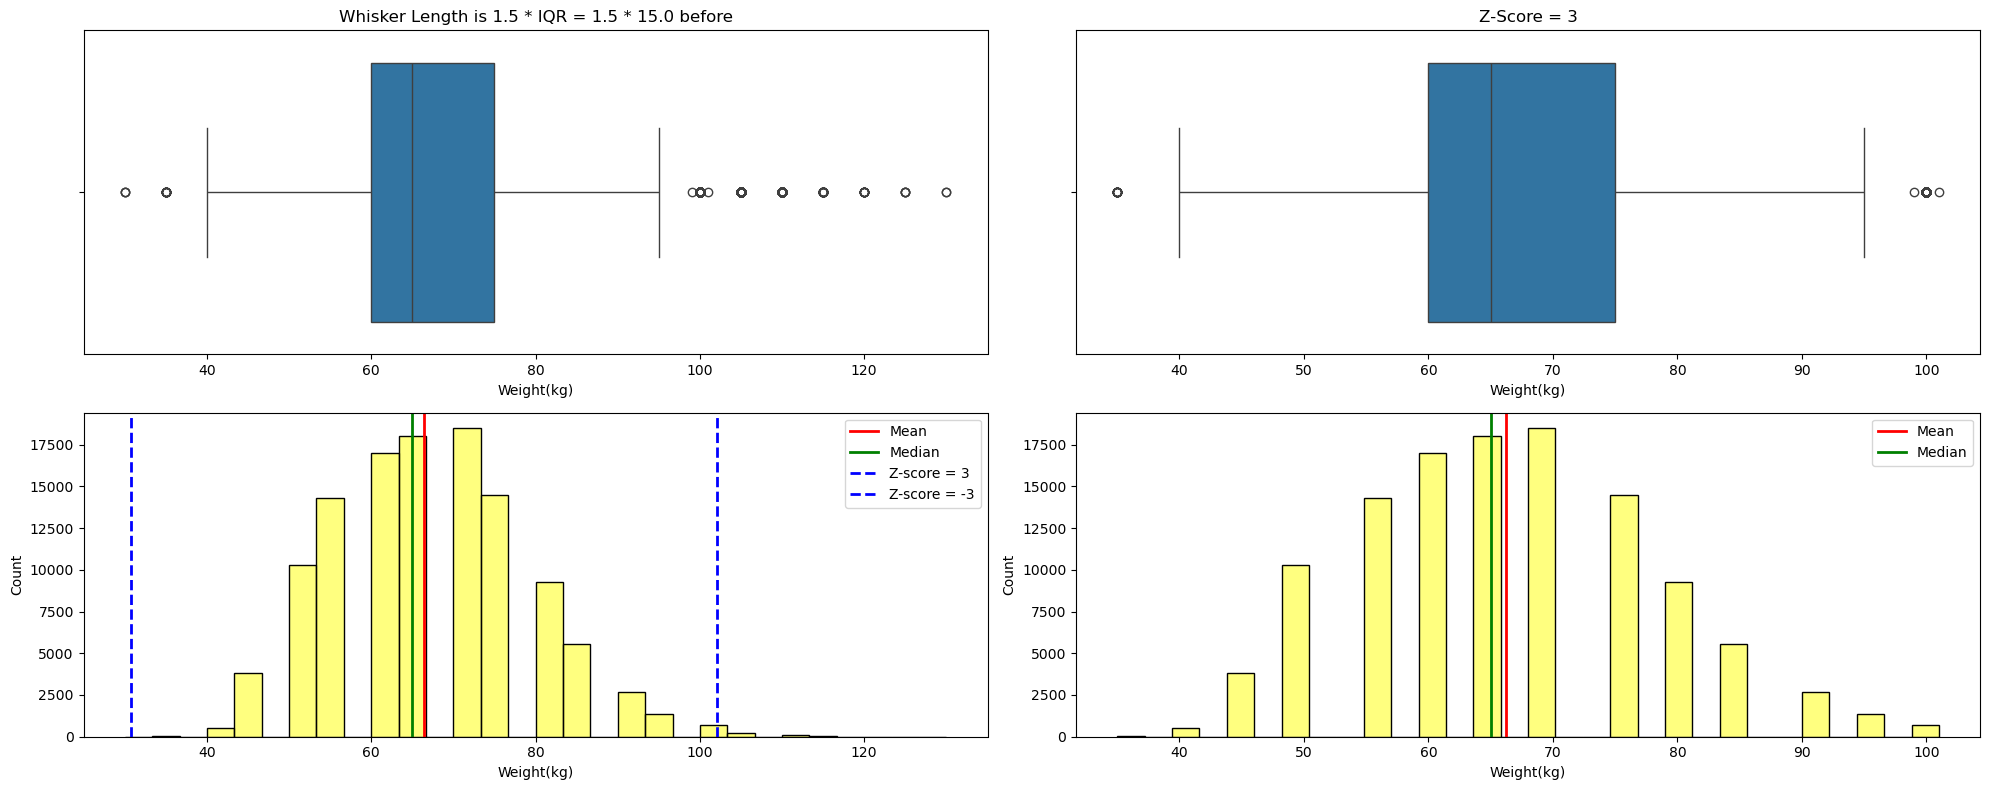

In [ ]:
# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

# Box Plot for Weight(kg) Feature before handling outliers
sns.boxplot(x=weight_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Weight(kg)')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)} before")

# Histogram for Weight(kg) Feature before handling outliers
sns.histplot(weight_feature, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Weight(kg)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(weight_mean, c='red', ls='-', lw=2)
axes[1, 0].axvline(weight_median, c='green', ls='-', lw=2)
axes[1, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Remove outliers using Z-Score from train_df
train_df = train_df[(train_df["weight(kg)"] > z_score_negative3) & (train_df["weight(kg)"] < z_score_positive3)]

# Box Plot for Weight(kg) Feature after handling outliers using Z-Score
sns.boxplot(x=weight_feature_Z, ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight(kg)')
axes[0, 1].set_title(f"Z-Score = 3")

# Histogram for Weight(kg) Feature after handling outliers using Z-Score
sns.histplot(weight_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight(kg)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(weight_feature_Z.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(weight_feature_Z.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Feature 8: Cholesterol**

### **Feature 9: Serum Creatinine**

### **Feature 10: Gtp**

# **Feature Scaling**

In [53]:
#function for applying all transformations on the features
def transform_features(feature_name):
    feature = train_df[feature_name].to_numpy()
    #print(type(feature))
    #print(feature)

    # original data
    sns.histplot(feature, bins=30, alpha=0.5, color="red")
    plt.xlabel('Original Data')
    plt.ylabel('Frequency')
    plt.axvline(feature.mean(), c='red', ls='-', lw=2)
    plt.legend(labels=['Mean'])
    plt.title('Histogram of Original Data')
    plt.show()

    fig, axes = plt.subplots(2, 2, figsize=(20, 8))
    # square root transformation of the feature
    sqaure_root_transformed_data = np.sqrt(feature)
    #print(sqaure_root_transformed_data)

    sns.histplot(sqaure_root_transformed_data, bins=30, alpha=0.5, color="yellow",ax=axes[0,0])
    axes[0,0].set_xlabel('Transformed Data')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(sqaure_root_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[0,0].legend(labels=['Mean'])
    axes[0,0].set_title('Histogram of Square Root Transformed Data')

    # log transformation of the feature  
    trf = FunctionTransformer(np.log1p)
    log_transformed_data = trf.fit_transform(train_df[feature_name].to_numpy())
    #print(log_transformed_data)

    sns.histplot(log_transformed_data, bins=30, alpha=0.5, color="pink",ax=axes[1,0])
    axes[1,0].set_xlabel('Transformed Data')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(log_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[1,0].legend(labels=['Mean'])
    axes[1,0].set_title('Histogram of Log Transformed Data')

    # Box-Cox transformation of the feature
    pt = PowerTransformer(method='box-cox')
    box_cox_transformed_data = pt.fit_transform(train_df[feature_name].to_numpy().reshape(-1, 1))
    print(box_cox_transformed_data)

    sns.histplot(box_cox_transformed_data, bins=30, alpha=0.5, color="green",ax=axes[0,1])
    axes[0,1].set_xlabel('Transformed Data')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].axvline(box_cox_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[0,1].legend(labels=['Mean'])
    axes[0,1].set_title('Histogram of the Box Cox Transformed Data')

    #Yeo-Johnson transformation of the feature
    yt = PowerTransformer(method='yeo-johnson') #variation of box-cox but can handle negative values
    yeo_johnson_transformed_data = yt.fit_transform(train_df[feature_name].to_numpy().reshape(-1, 1))
    #print(yeo_johnson_transformed_data)

    sns.histplot(yeo_johnson_transformed_data, bins=30, alpha=0.5, color="blue", ax=axes[1,1])
    axes[1,1].set_xlabel('Transformed Data')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].axvline(yeo_johnson_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[1,1].legend(labels=['Mean'])
    axes[1,1].set_title('Histogram of Yeo-Johnson Transformed Data')

    plt.tight_layout()
    plt.show()

    return sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data

    

### Feature 1: Hemoglobin

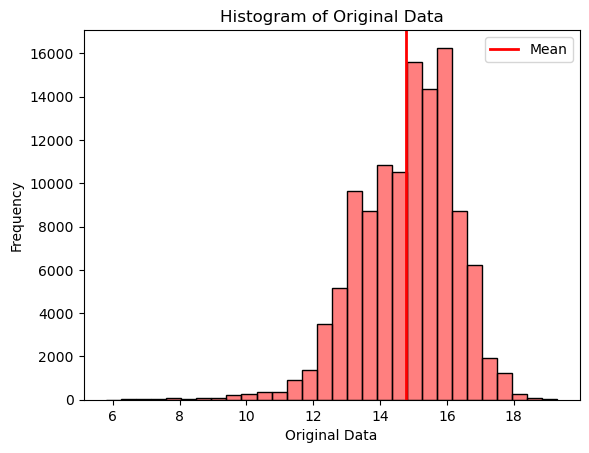

[[-1.85510401]
 [ 1.12075431]
 [-0.99683689]
 ...
 [ 0.78193182]
 [-0.74962161]
 [ 0.07593483]]


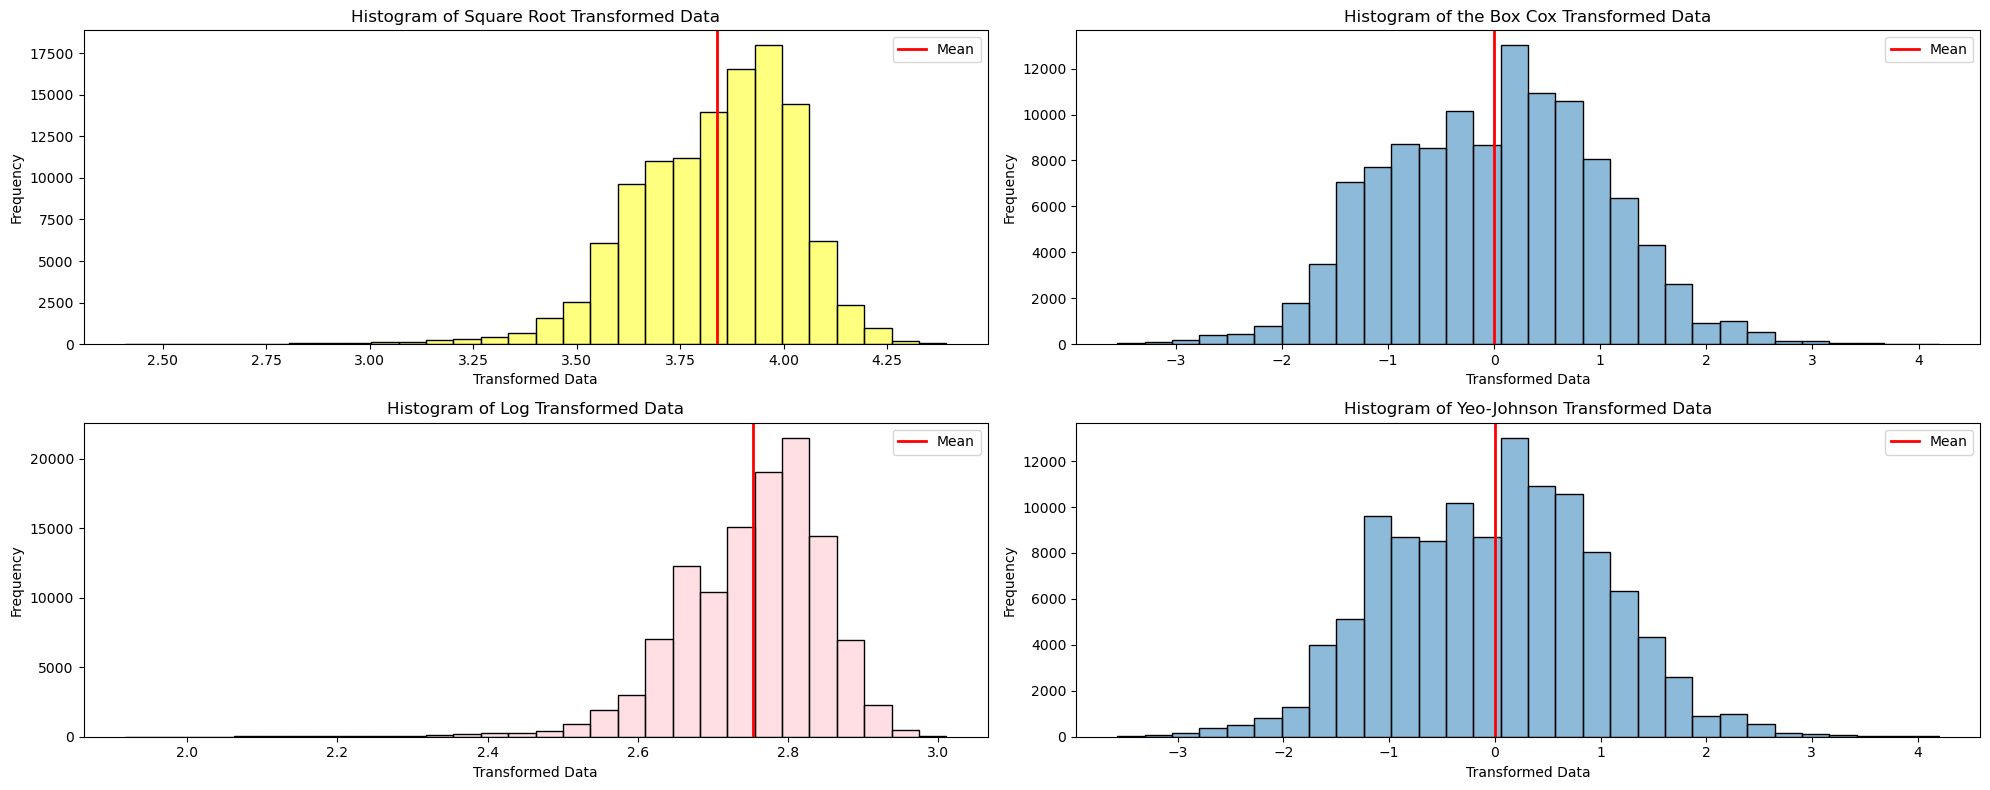

StandardScaler()
[[-1.85510401]
 [ 1.12075431]
 [-0.99683689]
 ...
 [ 0.78193182]
 [-0.74962161]
 [ 0.07593483]]
StandardScaler()
[[-1.69487607]
 [ 1.9289461 ]
 [ 0.2017444 ]
 ...
 [ 0.76110269]
 [-0.78008308]
 [ 0.12565519]]
StandardScaler()
[[-0.03223139]
 [-0.7178718 ]
 [-1.20443152]
 ...
 [-0.17646762]
 [ 3.33590588]
 [-0.84454783]]


In [54]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('hemoglobin')

#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data))
scaled_hemoglobin_train = scaler.transform(box_cox_transformed_data)
print(scaled_hemoglobin_train)

# scale validation and test sets
pt = PowerTransformer(method='box-cox')
box_cox_transformed_data_val = pt.fit_transform(val_df['hemoglobin'].to_numpy().reshape(-1, 1))
box_cox_transformed_data_test = pt.fit_transform(test_df['hemoglobin'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data_val))
scaled_hemoglobin_val = scaler.transform(box_cox_transformed_data_val)
print(scaled_hemoglobin_val)

scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data_test))
scaled_hemoglobin_test = scaler.transform(box_cox_transformed_data_test)
print(scaled_hemoglobin_test)



### Feature 2: Hearing

In [56]:
#decreasing the feature column by 1 so it is in the range of 0-1
print(train_df['hearing(right)'].unique())
scaled_hearing_train = train_df['hearing(right)'] - 1
print(scaled_hearing_train.unique())

#scaling test and val datasets
scaled_hearing_val = val_df['hearing(right)'] - 1
scaled_hearing_test = test_df['hearing(right)'] - 1

print(scaled_hearing_val.unique())
print(scaled_hearing_test.unique())

[1 2]
[0 1]
[0 1]
[0 1]


### Feature 4: Fasting Blood Sugar

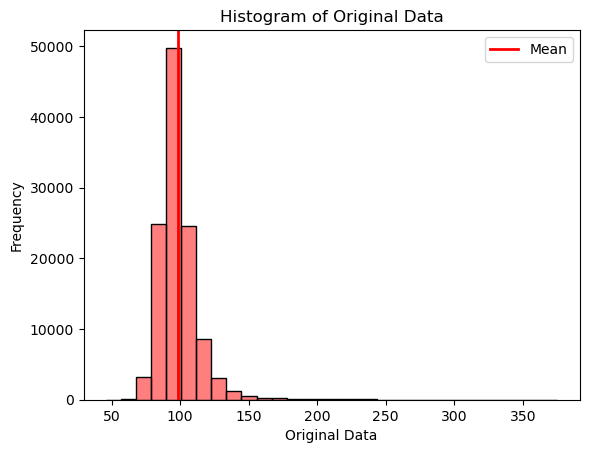

[[ 0.4802463 ]
 [ 3.66080781]
 [-0.65935609]
 ...
 [ 0.00869601]
 [-0.76730916]
 [-0.87881036]]


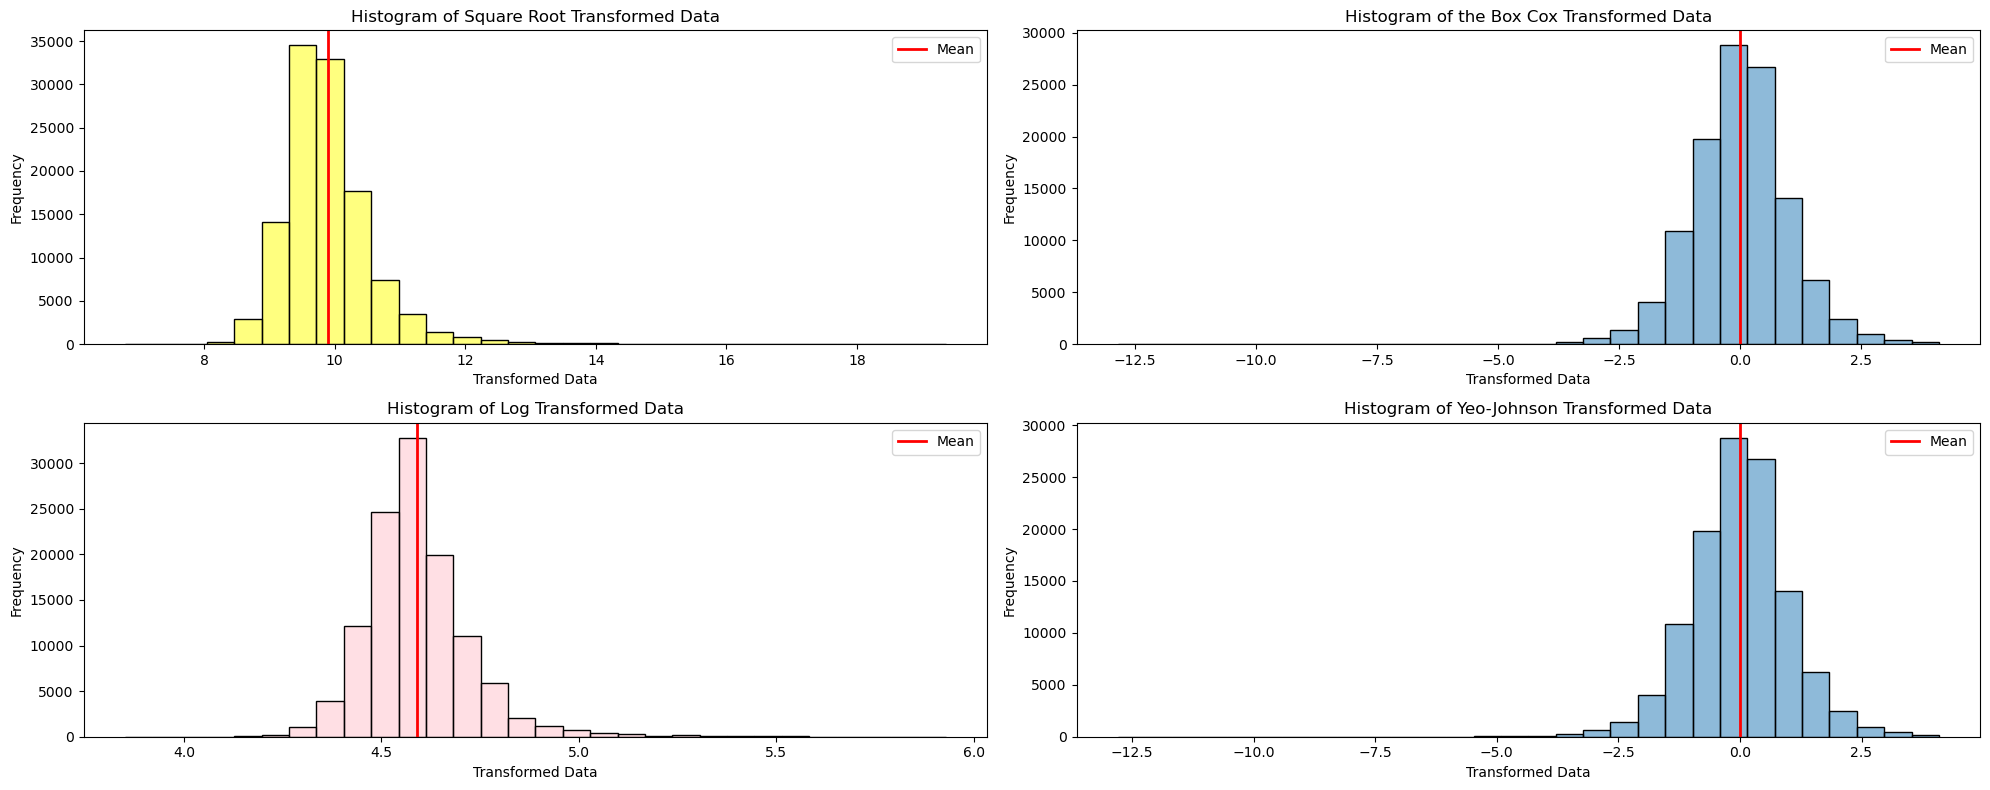

StandardScaler()
[[ 0.4802463 ]
 [ 3.66080781]
 [-0.65935609]
 ...
 [ 0.00869601]
 [-0.76730916]
 [-0.87881036]]
StandardScaler()
[[-0.0870676 ]
 [-0.0870676 ]
 [-0.36653296]
 ...
 [ 0.16858299]
 [-0.17743299]
 [-0.4655031 ]]
StandardScaler()
[[-1.24368403]
 [-1.91832937]
 [ 0.6771991 ]
 ...
 [-0.88944143]
 [ 0.4681996 ]
 [ 0.07953991]]


In [57]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('fasting blood sugar')

#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data))
scaled_fasting_blood_sugar_train = scaler.transform(box_cox_transformed_data)
print(scaled_fasting_blood_sugar_train)

# scale validation and test sets
pt = PowerTransformer(method='box-cox')
box_cox_transformed_data_val = pt.fit_transform(val_df['fasting blood sugar'].to_numpy().reshape(-1, 1))
box_cox_transformed_data_test = pt.fit_transform(test_df['fasting blood sugar'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data_val))
scaled_fasting_blood_sugar_val = scaler.transform(box_cox_transformed_data_val)
print(scaled_fasting_blood_sugar_val)

scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data_test))
scaled_fasting_blood_sugar_test = scaler.transform(box_cox_transformed_data_test)
print(scaled_fasting_blood_sugar_test)


### Feature 5: LDL

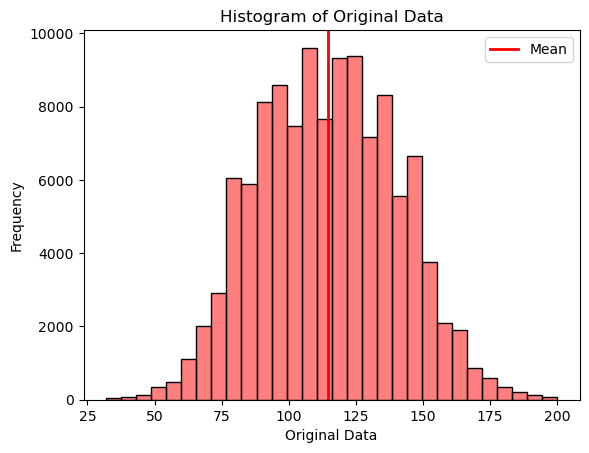

[[-0.18817028]
 [ 0.31423006]
 [-0.7034362 ]
 ...
 [-0.946162  ]
 [-1.61113258]
 [ 0.08383703]]


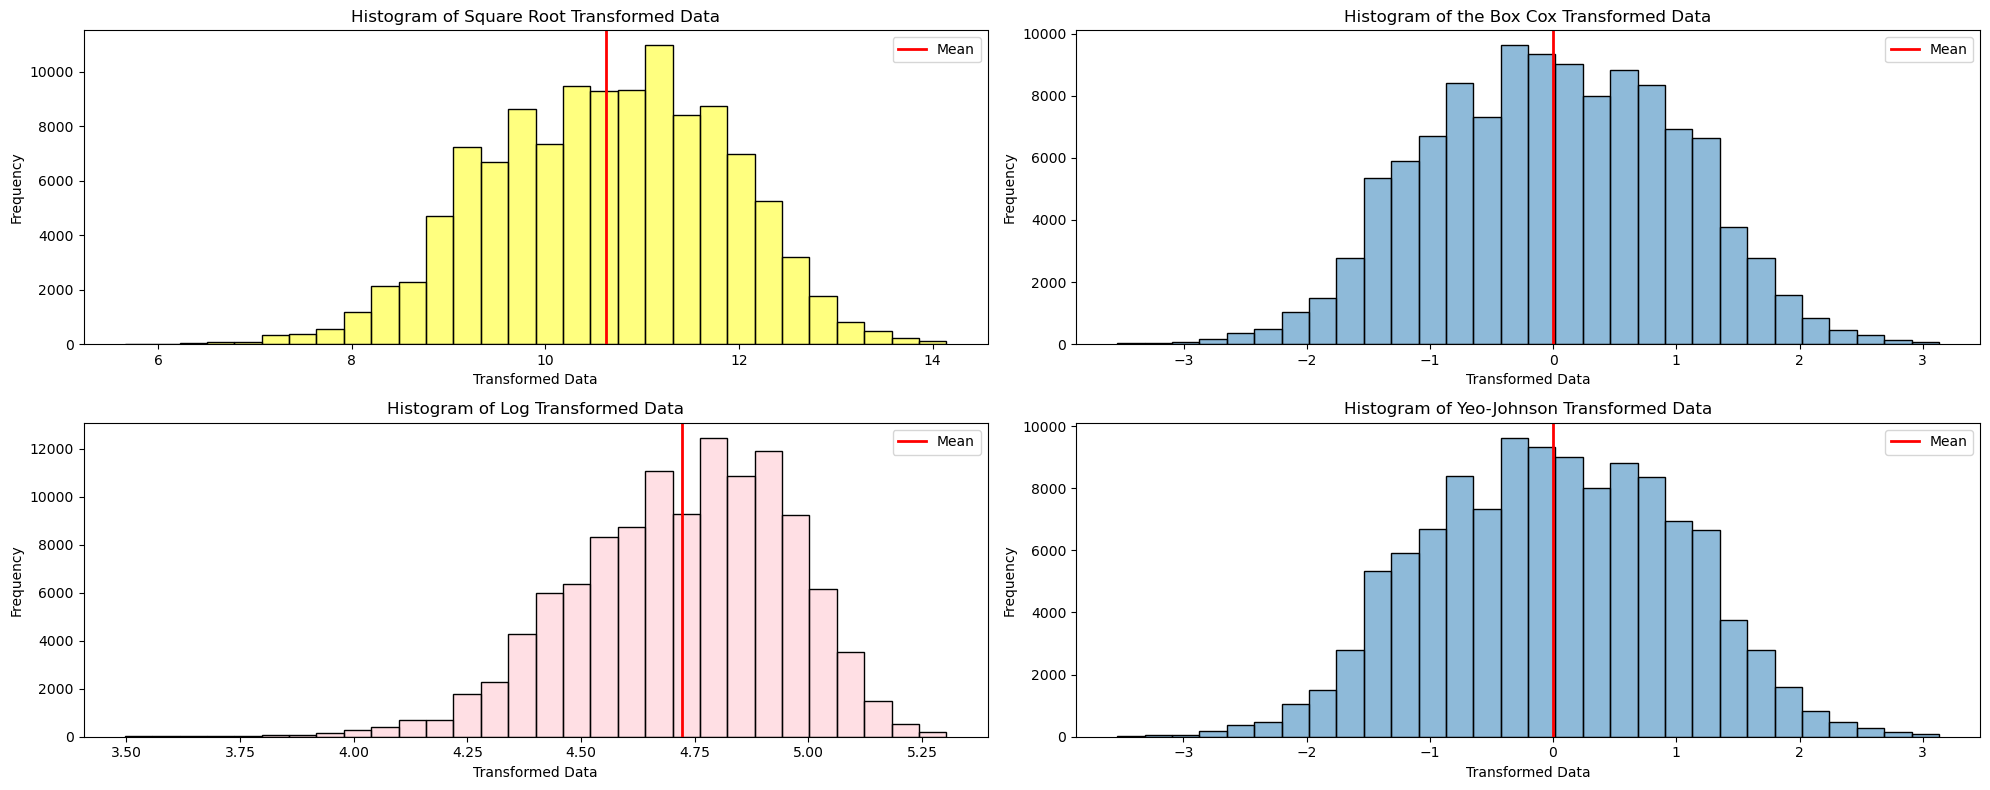

StandardScaler()
[[-0.21215019]
 [ 0.29321777]
 [-0.71751815]
 ...
 [-0.9507649 ]
 [-1.57275624]
 [ 0.05997102]]
StandardScaler()
[[ 0.16524545]
 [ 2.29757493]
 [ 1.81963901]
 ...
 [-1.1215051 ]
 [-2.26119845]
 [ 1.34170309]]
StandardScaler()
[[ 1.20993012]
 [ 1.44091052]
 [ 1.44091052]
 ...
 [ 1.78738111]
 [-1.21536404]
 [-0.79189998]]


In [58]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('LDL')

LDL_feature = train_df['LDL'].to_numpy().reshape(-1, 1)
#scaling the data using standard scaler usnig original data
scaler = StandardScaler()
print(scaler.fit(LDL_feature))
scaled_LDL_train = scaler.transform(LDL_feature)
print(scaled_LDL_train)

# scale validation and test sets
LDL_feature_val = val_df['LDL'].to_numpy().reshape(-1, 1)
LDL_feature_test = test_df['LDL'].to_numpy().reshape(-1, 1)

scaler = StandardScaler()
print(scaler.fit(LDL_feature_val))
scaled_LDL_val = scaler.transform(LDL_feature_val)
print(scaled_LDL_val)

scaler = StandardScaler()
print(scaler.fit(LDL_feature_test))
scaled_LDL_test = scaler.transform(LDL_feature_test)
print(scaled_LDL_test)

### Feature 6: Height

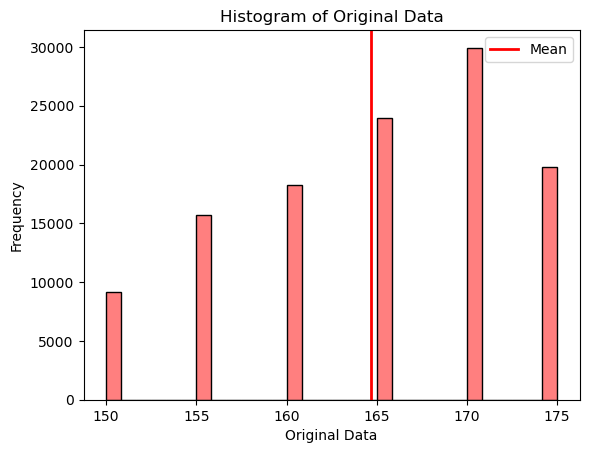

[[-1.72692377]
 [-1.72692377]
 [-1.24219039]
 ...
 [-0.05423924]
 [-0.68713485]
 [ 0.66454935]]


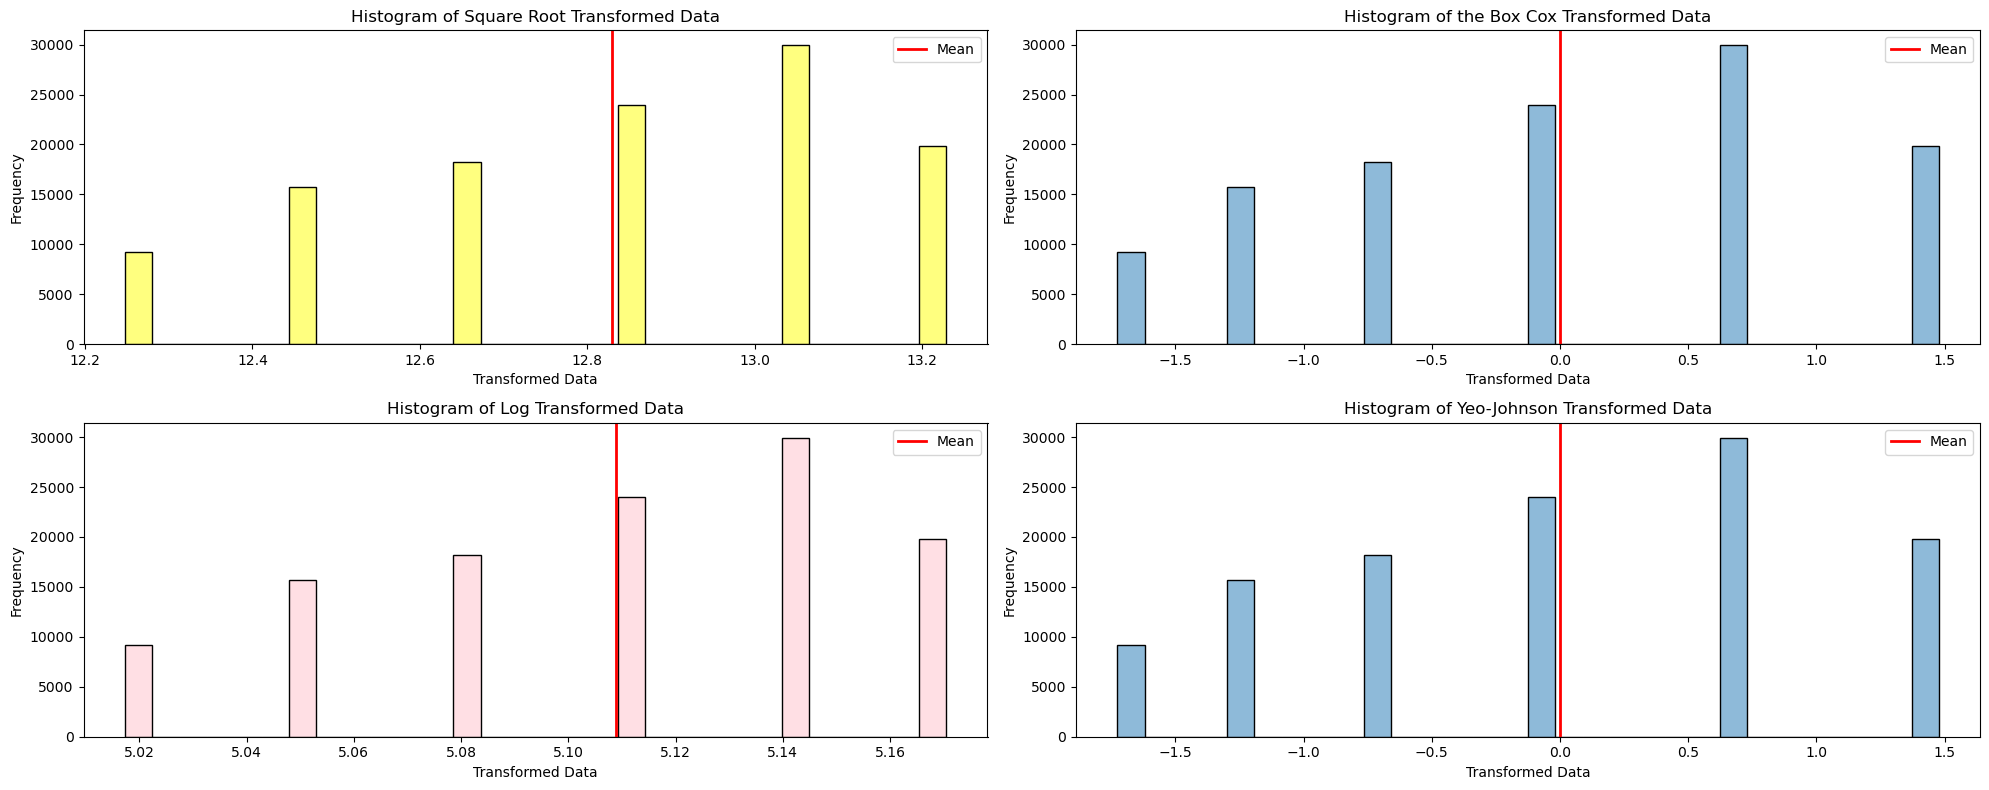

MinMaxScaler()
[[0. ]
 [0. ]
 [0.2]
 ...
 [0.6]
 [0.4]
 [0.8]]
MinMaxScaler()
[[0.36363636]
 [0.81818182]
 [0.63636364]
 ...
 [0.63636364]
 [0.27272727]
 [0.27272727]]
MinMaxScaler()
[[0.8]
 [0.4]
 [0.3]
 ...
 [0.7]
 [0.6]
 [0.4]]


In [59]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('height(cm)')

original_feature = train_df['height(cm)'].to_numpy().reshape(-1, 1)

#scaling the data using min-max scaler using original data
scaler = MinMaxScaler()
print(scaler.fit(original_feature))
scaled_height_train = scaler.transform(original_feature)
print(scaled_height_train)

#scale validation and test sets
original_feature_val = val_df['height(cm)'].to_numpy().reshape(-1, 1)
original_feature_test = test_df['height(cm)'].to_numpy().reshape(-1, 1)

scaler = MinMaxScaler()
print(scaler.fit(original_feature_val))
scaled_height_val = scaler.transform(original_feature_val)
print(scaled_height_val)

scaler = MinMaxScaler()
print(scaler.fit(original_feature_test))
scaled_height_test = scaler.transform(original_feature_test)
print(scaled_height_test)


### Feature 7: Weight

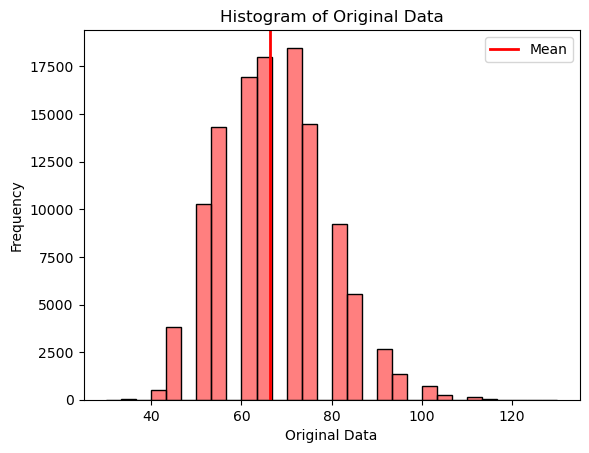

[[-1.47218225]
 [-1.47218225]
 [-0.96253421]
 ...
 [-0.04709483]
 [-0.48928181]
 [ 1.48399029]]


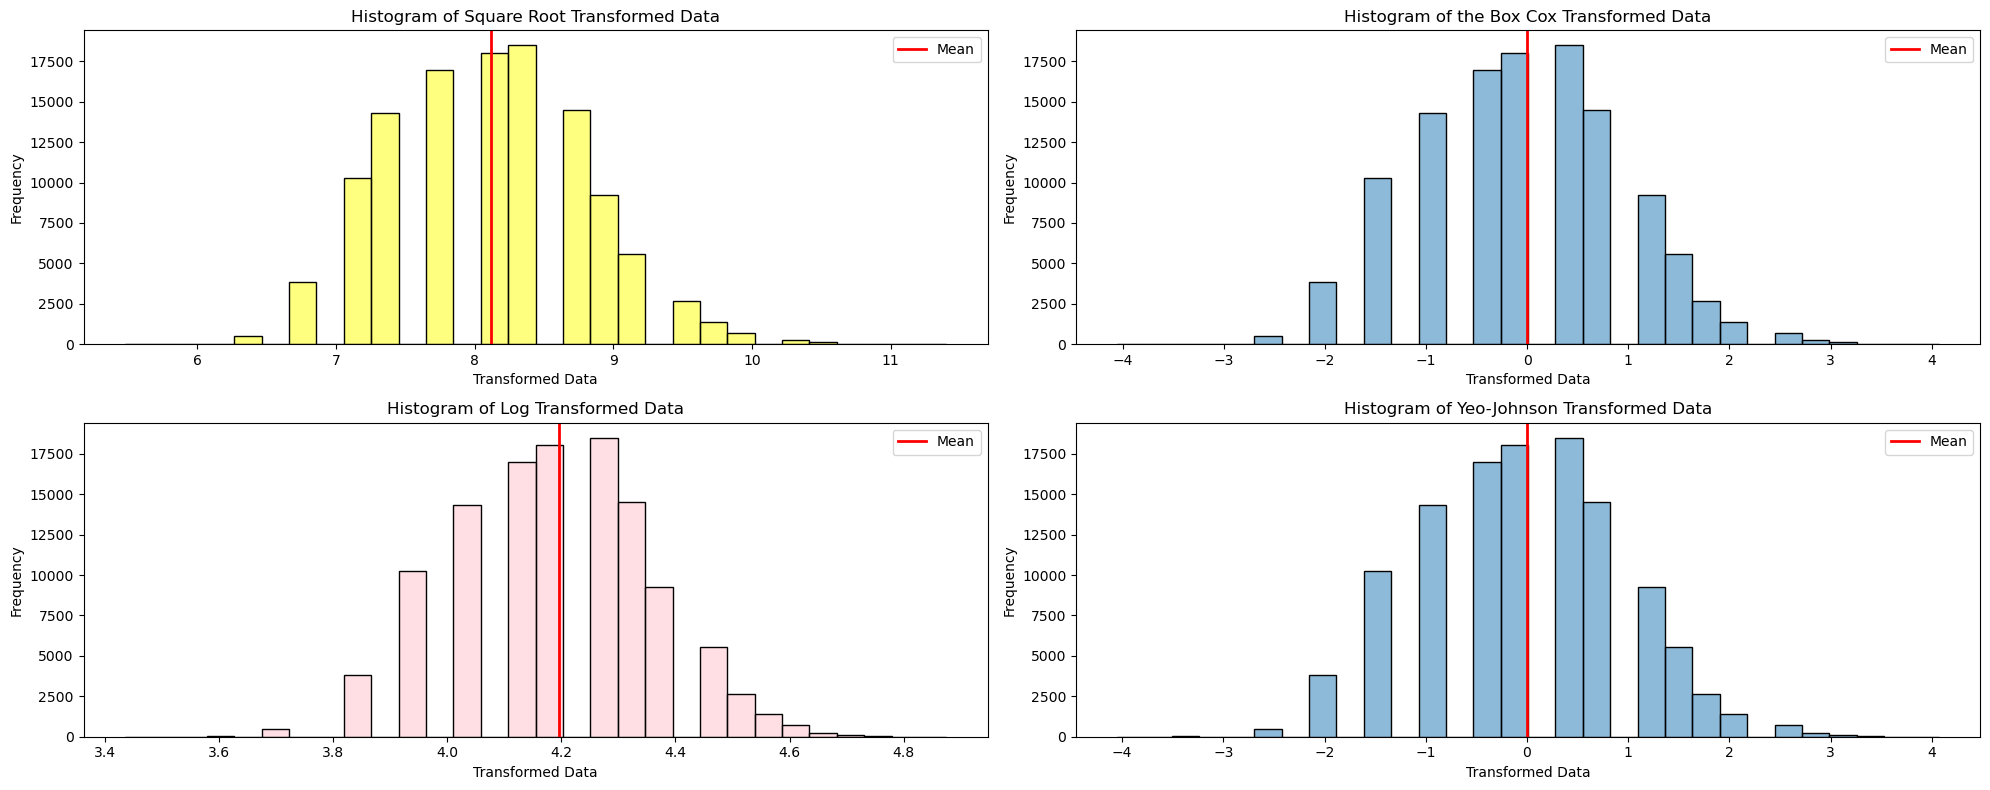

RobustScaler()
[[-1.        ]
 [-1.        ]
 [-0.66666667]
 ...
 [ 0.        ]
 [-0.33333333]
 [ 1.33333333]]
RobustScaler()
[[-0.33333333]
 [ 0.66666667]
 [ 0.33333333]
 ...
 [-0.33333333]
 [-1.        ]
 [-0.66666667]]
RobustScaler()
[[ 0.66666667]
 [-1.33333333]
 [-0.66666667]
 ...
 [ 1.        ]
 [ 1.        ]
 [ 0.        ]]


In [60]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('weight(kg)')

original_data = train_df['weight(kg)'].to_numpy().reshape(-1, 1)
#scaling the data using robust scaler beacause it is robust to outliers and can handle them
scaler = RobustScaler()
print(scaler.fit(original_data))
scaled_weight = scaler.transform(original_data)
print(scaled_weight)

#scale validation and test sets
original_data_val = val_df['weight(kg)'].to_numpy().reshape(-1, 1)
original_data_test = test_df['weight(kg)'].to_numpy().reshape(-1, 1)

scaler = RobustScaler()
print(scaler.fit(original_data_val))
scaled_weight_val = scaler.transform(original_data_val)
print(scaled_weight_val)

scaler = RobustScaler()
print(scaler.fit(original_data_test))
scaled_weight_test = scaler.transform(original_data_test)
print(scaled_weight_test)


### Feature 8: Cholesterol

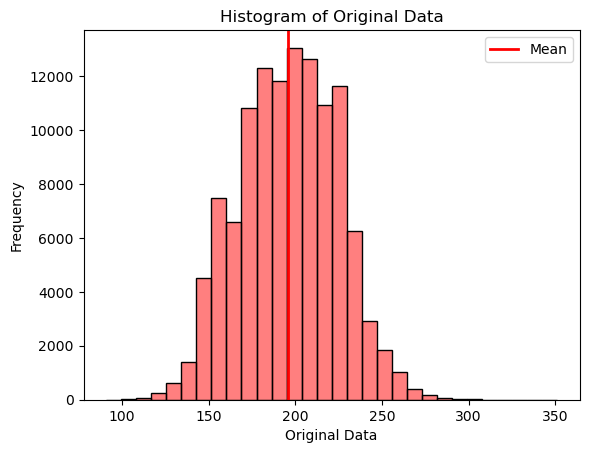

[[-0.59471133]
 [ 0.50606918]
 [-1.48960776]
 ...
 [-0.95183828]
 [-1.05918713]
 [-0.73743478]]


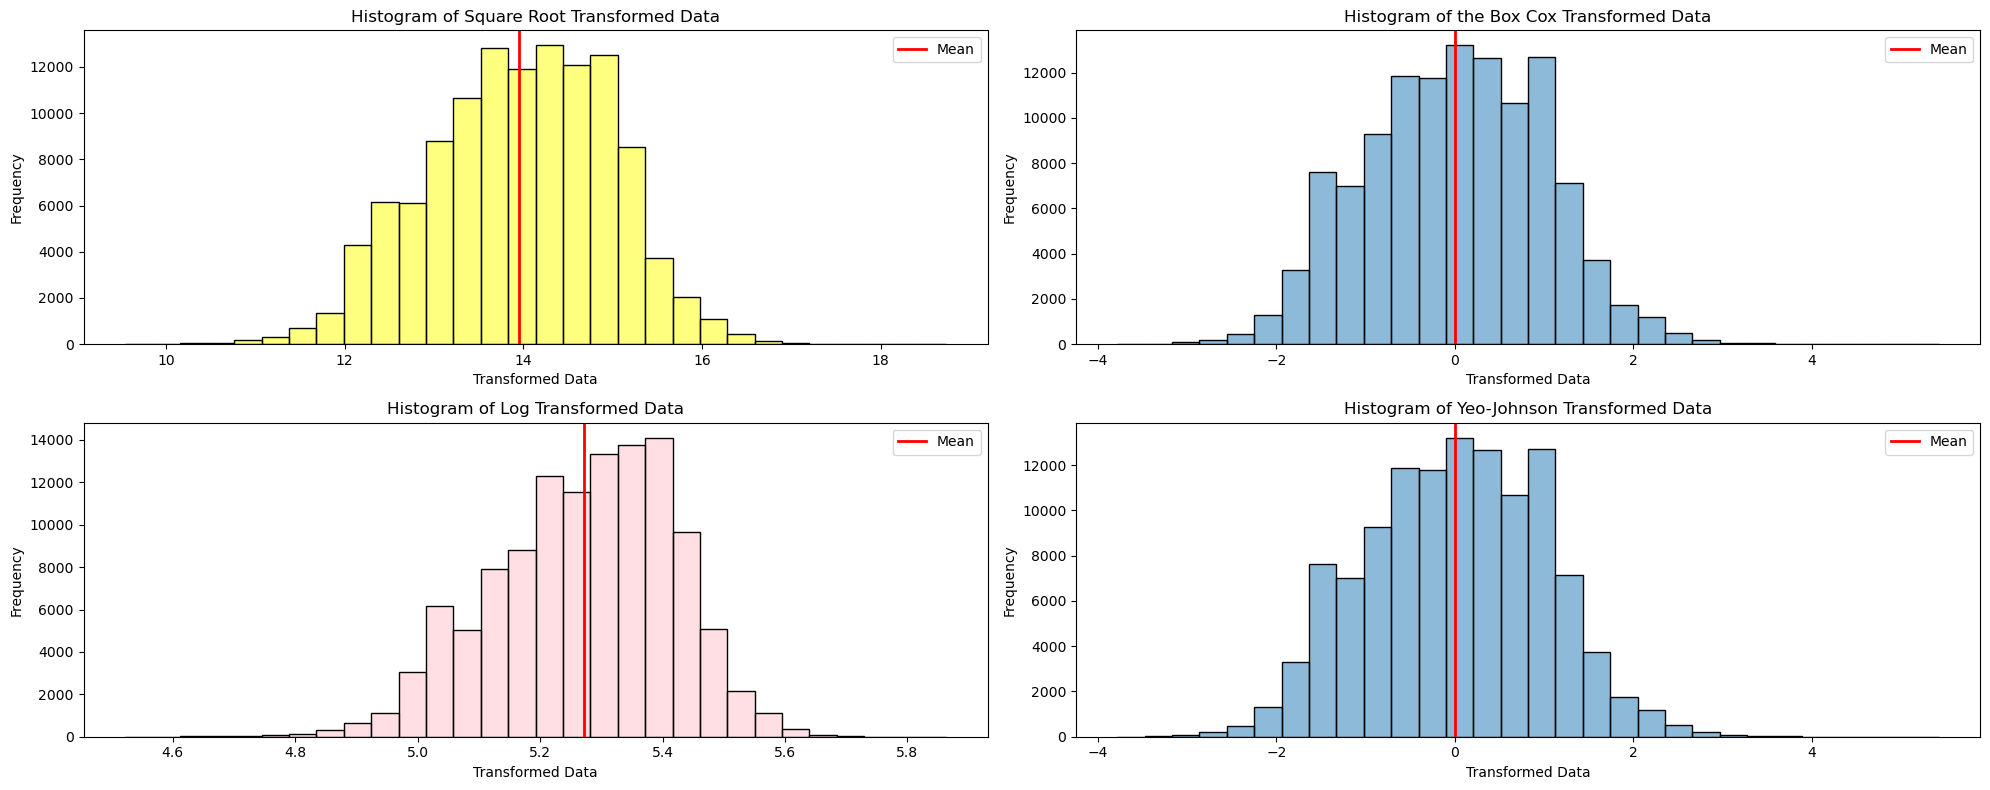

StandardScaler()
[[-0.59740753]
 [ 0.5034888 ]
 [-1.48522716]
 ...
 [-0.95253538]
 [-1.05907374]
 [-0.73945867]]
StandardScaler()
[[ 0.39413195]
 [ 2.01162047]
 [ 0.99189945]
 ...
 [-1.5749845 ]
 [-3.15731022]
 [ 0.95673665]]
StandardScaler()
[[ 0.85441799]
 [ 1.91509502]
 [ 1.1019093 ]
 ...
 [ 1.1726211 ]
 [-1.33764787]
 [-0.10019133]]


In [61]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('Cholesterol')

original_feature = train_df['Cholesterol'].to_numpy().reshape(-1, 1)
#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(original_feature))
scaled_cholesterol = scaler.transform(original_feature)
print(scaled_cholesterol)

#scaled validation and test sets

original_feature_val = val_df['Cholesterol'].to_numpy().reshape(-1, 1)
original_feature_test = test_df['Cholesterol'].to_numpy().reshape(-1, 1)

scaler = StandardScaler()
print(scaler.fit(original_feature_val))
scaled_cholesterol_val = scaler.transform(original_feature_val)
print(scaled_cholesterol_val)

scaler = StandardScaler()
print(scaler.fit(original_feature_test))
scaled_cholesterol_test = scaler.transform(original_feature_test)
print(scaled_cholesterol_test)

### Feature 9: Serum Creatinine

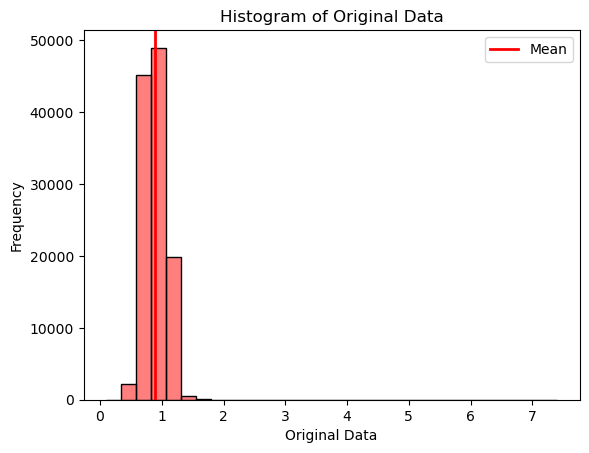

[[-1.71394554]
 [-1.71394554]
 [-1.71394554]
 ...
 [ 0.09078504]
 [-1.71394554]
 [ 0.63669768]]


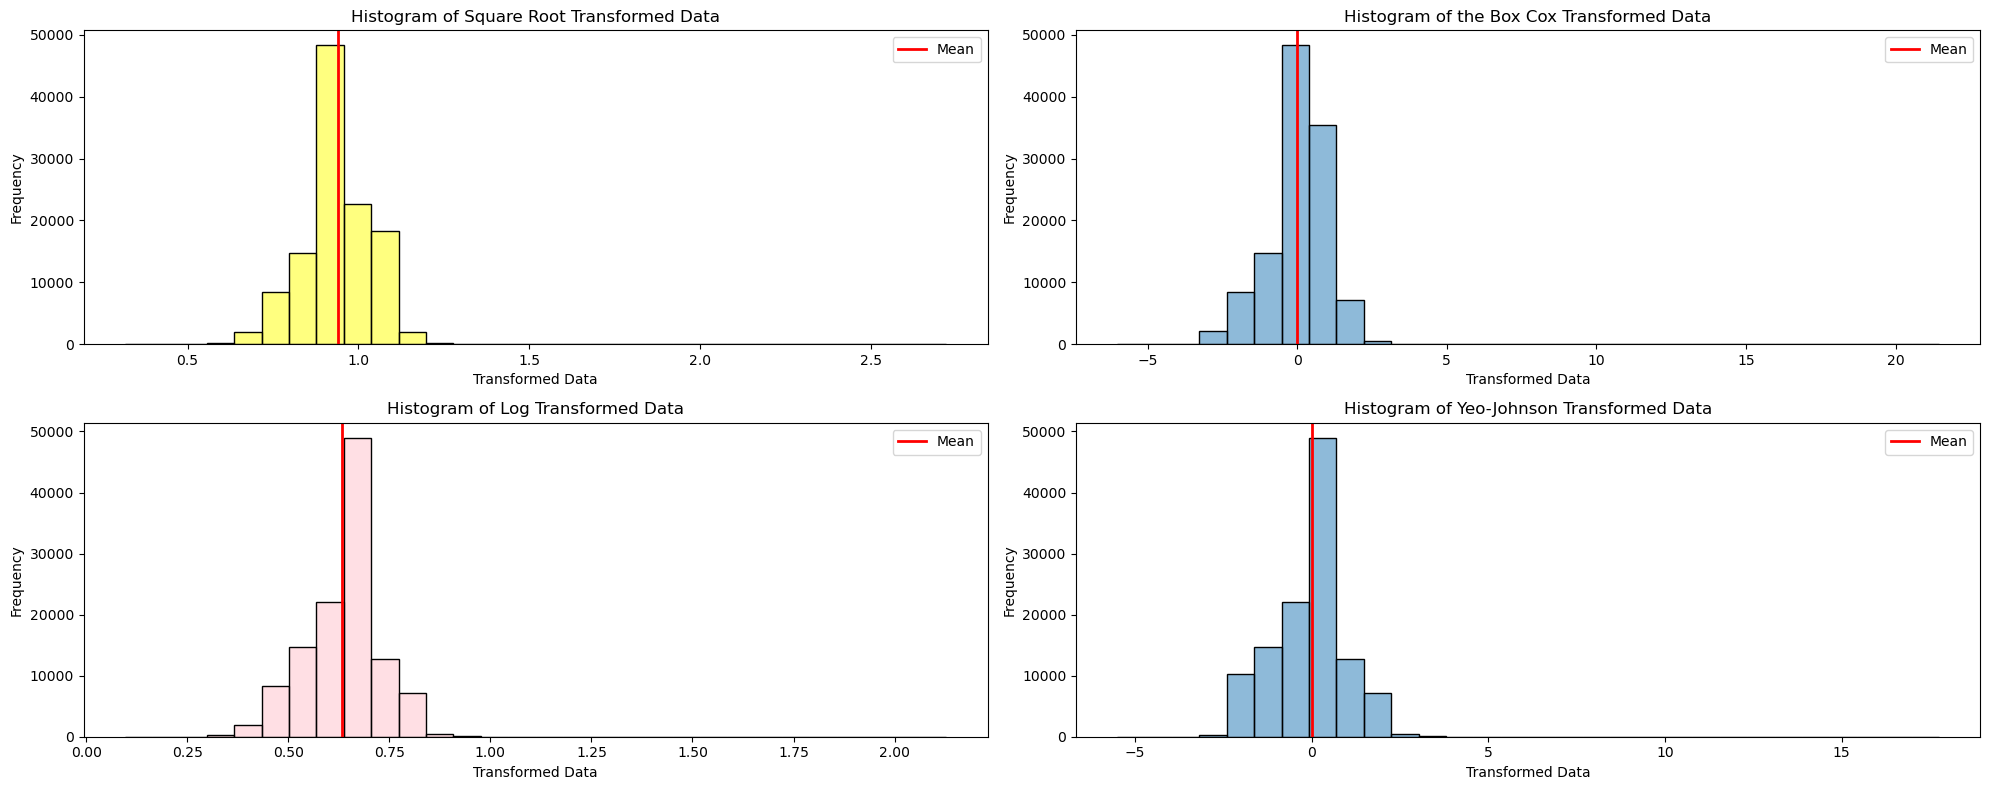

MinMaxScaler()
[[0.1843128 ]
 [0.1843128 ]
 [0.1843128 ]
 ...
 [0.26884644]
 [0.1843128 ]
 [0.29407776]]
MinMaxScaler()
[[0.40766202]
 [0.51182142]
 [0.55985602]
 ...
 [0.55985602]
 [0.40766202]
 [0.46118912]]
MinMaxScaler()
[[0.425483  ]
 [0.425483  ]
 [0.37610007]
 ...
 [0.47219525]
 [0.67403057]
 [0.37610007]]


In [65]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('serum creatinine')

log_transformed_data = log_transformed_data.reshape(-1, 1)
#scaling the data using min-max scaler
scaler = MinMaxScaler()
print(scaler.fit(log_transformed_data))
scaled_serum_creatinine = scaler.transform(log_transformed_data)
print(scaled_serum_creatinine)

#scale validation and test sets
trf = FunctionTransformer(np.log1p)
log_transformed_data_val = trf.fit_transform(val_df['serum creatinine'].to_numpy())

log_transformed_data_val = log_transformed_data_val.reshape(-1, 1)
scaler = MinMaxScaler()
print(scaler.fit(log_transformed_data_val))
scaled_serum_creatinine_val = scaler.transform(log_transformed_data_val)
print(scaled_serum_creatinine_val)

trf = FunctionTransformer(np.log1p)
log_transformed_data_test = trf.fit_transform(test_df['serum creatinine'].to_numpy())

log_transformed_data_test = log_transformed_data_test.reshape(-1, 1)
scaler = MinMaxScaler()
print(scaler.fit(log_transformed_data_test))
scaled_serum_creatinine_test = scaler.transform(log_transformed_data_test)
print(scaled_serum_creatinine_test)

### Feature 10: Gtp

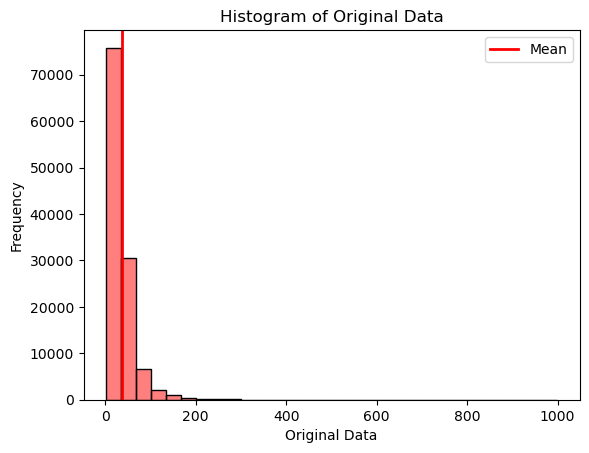

[[-2.23362182]
 [-0.14651947]
 [-0.97434031]
 ...
 [ 1.00412657]
 [-1.24611196]
 [ 0.60551821]]


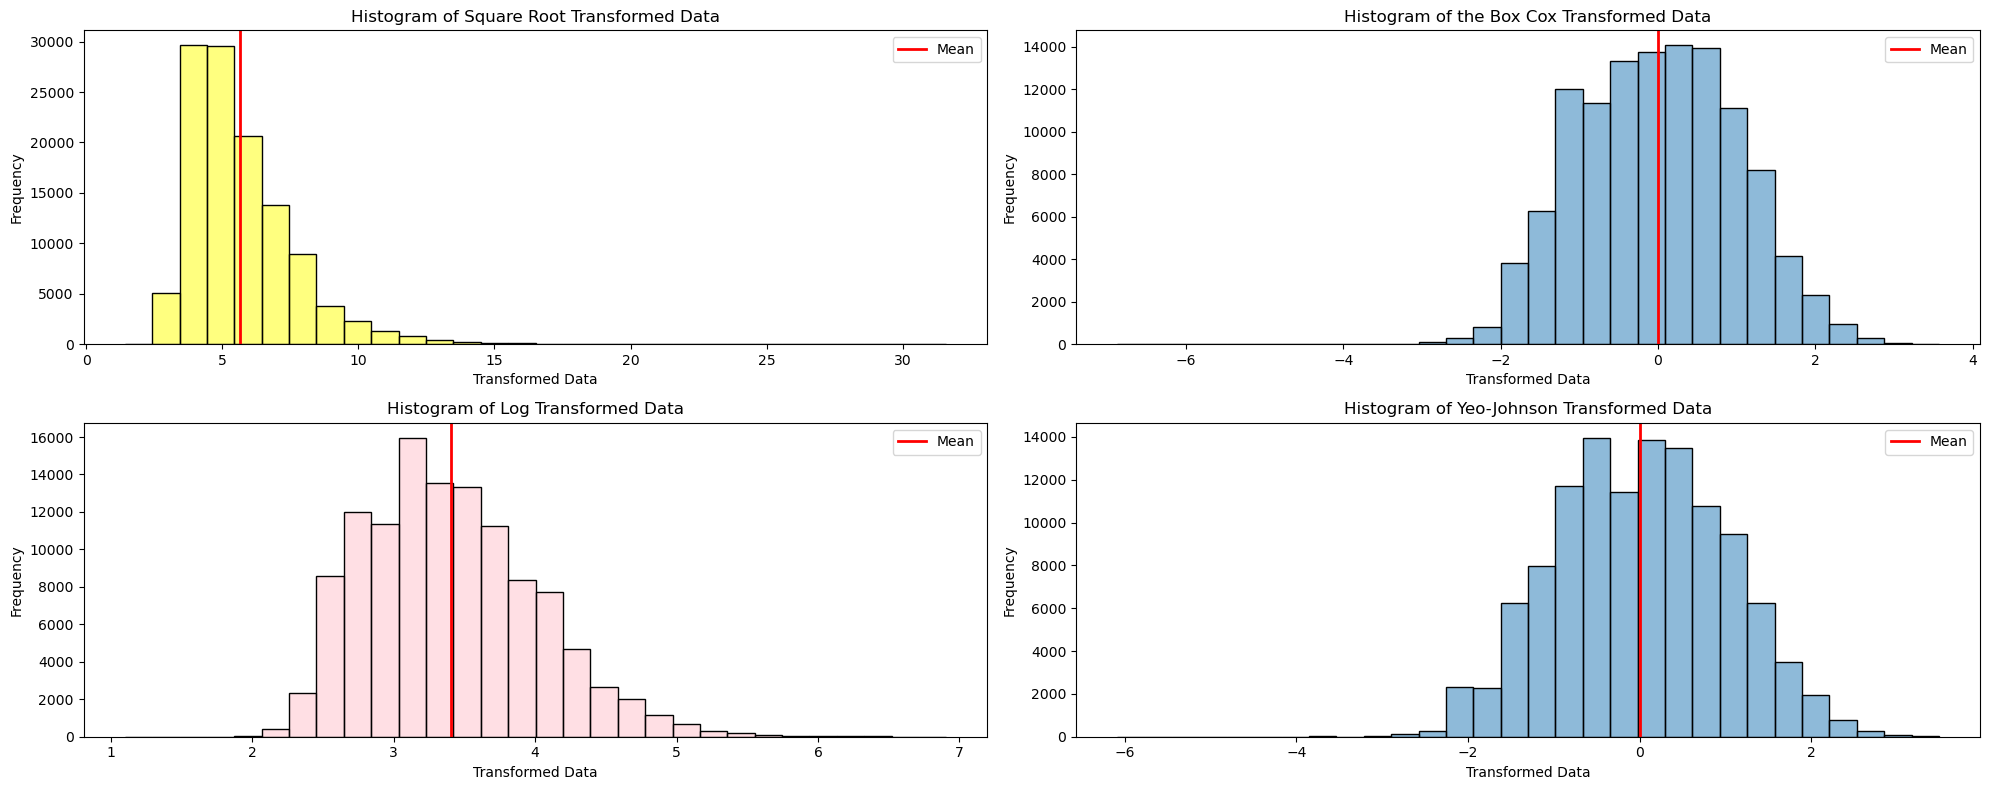

StandardScaler()
[[-2.23362182]
 [-0.14651947]
 [-0.97434031]
 ...
 [ 1.00412657]
 [-1.24611196]
 [ 0.60551821]]
StandardScaler()
[[-0.55524551]
 [ 1.65020089]
 [ 0.50936631]
 ...
 [-0.55524551]
 [ 0.08729455]
 [-0.97912051]]
StandardScaler()
[[ 1.41118657]
 [-0.32028332]
 [-0.48247643]
 ...
 [-0.17527722]
 [ 1.28175758]
 [ 1.19959252]]


In [66]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('Gtp')

#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data))
scaled_Gtp = scaler.transform(box_cox_transformed_data)
print(scaled_Gtp)

#scale validation and test sets
pt = PowerTransformer(method='box-cox')
box_cox_transformed_data_val = pt.fit_transform(val_df['Gtp'].to_numpy().reshape(-1, 1))
box_cox_transformed_data_test = pt.fit_transform(test_df['Gtp'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data_val))
scaled_Gtp_val = scaler.transform(box_cox_transformed_data_val)
print(scaled_Gtp_val)

scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data_test))
scaled_Gtp_test = scaler.transform(box_cox_transformed_data_test)
print(scaled_Gtp_test)

### Correlation Between Categorical Features With target

Note:
Since the phi correlation between hearing and smoking is very low, we can drop the hearing feature

<Axes: >

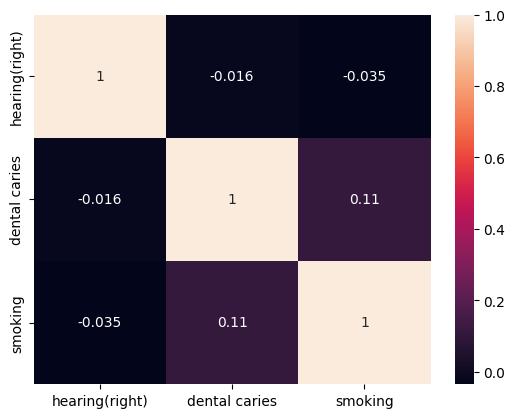

In [8]:
from sklearn.metrics import matthews_corrcoef

categorical_correlation_df = pd.DataFrame()


categorical_features_target = ["hearing(right)","dental caries","smoking"]

#Transform from 1/0 to 1/-1 to use mathe's coefficient
categorical_correlation_df["smoking"] = 2*train_df["smoking"] - 1
categorical_correlation_df["dental caries"] = 2*train_df["dental caries"] - 1
categorical_correlation_df["hearing(right)"] = 2*train_df["hearing(right)"] - 3

categ_correlation_matrix = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        categ_correlation_matrix[i][j] = matthews_corrcoef(categorical_correlation_df[categorical_features_target[i]], categorical_correlation_df[categorical_features_target[j]])

sns.heatmap(categ_correlation_matrix, annot=True, xticklabels=categorical_features_target, yticklabels=categorical_features_target)

